# Assignment 1: Future Spread Dynamics

1. Introduction:

Futures markets are a critical component of the global financial system, offering traders the ability to hedge against price movements and insight into expectations of future price changes. This work delves into the complex world of futures spread trading and its various dynamics which will be investigated in the analysis and different patterns will be assessed. 

Import various python modules that are to be used for obtaining data, preparing it and analysing the data.

In [4]:
import os
import datetime
import shutil

import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import plotnine as p9
import functools
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import probplot
from datetime import datetime
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

2. Obtaining Data from Quandl OWF Database:

To retrieve data from the Quandl Option Works Futures database two different functions are used. One function is the grab_quandl_table function that is responsible for downloading the table from the Quandl database and storing the data in the workstation. The other function fetch_quandl_table which is a wrapper that uses grab-quandl_table function to fetch and read a Quandl data table into a pandas dataframe. 

In [7]:
def grab_quandl_table(
    table_path,
    avoid_download=False,
    replace_existing=False,
    date_override=None,
    allow_old_file=False,
    **kwargs,
):
    root_data_dir = os.path.join("C:", "quandl_data_table_downloads")
    data_symlink = os.path.join(root_data_dir, f"{table_path}_latest.zip")
    if avoid_download and os.path.exists(data_symlink):
        print(f"Skipping any possible download of {table_path}")
        return data_symlink
    
    table_dir = os.path.dirname(data_symlink)
    if not os.path.isdir(table_dir):
        print(f'Creating new data dir {table_dir}')
        os.makedirs(table_dir, exist_ok=True)

    if date_override is None:
        my_date = datetime.now().strftime("%Y%m%d")
    else:
        my_date = date_override
    data_file = os.path.join(root_data_dir, f"{table_path}_{my_date}.zip")

    if os.path.exists(data_file):
        file_size = os.stat(data_file).st_size
        if replace_existing or not file_size > 0:
            print(f"Removing old file {data_file} size {file_size}")
        else:
            print(
                f"Data file {data_file} size {file_size} exists already, no need to download"
            )
            return data_file

    dl = quandl.export_table(
        table_path, filename=data_file, api_key="9v9zUkZARMYqBCzFPXzZ", **kwargs
    )
    file_size = os.stat(data_file).st_size
    if os.path.exists(data_file) and file_size > 0:
        print(f"Download finished: {file_size} bytes")
    if not date_override:
        if os.path.exists(data_symlink):
            print(f"Removing old symlink")
            os.unlink(data_symlink)
        print(f"Creating symlink: {data_file} -> {data_symlink}")
        shutil.copyfile(data_file, data_symlink)
    else:
        print(f"Data file {data_file} failed download")
        return
    return data_symlink if (date_override is None or allow_old_file) else "NoFileAvailable"



def fetch_quandl_table(table_path, avoid_download=True, **kwargs):
    return pd.read_csv(
        grab_quandl_table(table_path, avoid_download=avoid_download, **kwargs)
    )

In [8]:
t_ivm = fetch_quandl_table('AR/IVM', avoid_download=False)
t_ivm.head()

Download finished: 290329381 bytes
Removing old symlink
Creating symlink: C:quandl_data_table_downloads\AR/IVM_20240115.zip -> C:quandl_data_table_downloads\AR/IVM_latest.zip


,exchange_code,futures_code,option_code,expiration,date,futures,atm,rr25,rr10,fly25,...,beta1,beta2,beta3,beta4,beta5,beta6,min_money,max_money,days_expiration,days_termination
0,CBT,BO,BO,V2024,2023-07-27,58.040000,0.303074,-0.004934,NaN,-0.005185,...,-0.013514,-0.210955,0.274140,1.697856,-1.023394,-4.179139,-0.549587,0.444217,421.24,445.0
1,ICE,KC,KC,H2026,2023-10-02,158.550000,0.288991,0.015911,NaN,0.000022,...,0.025836,-0.177754,0.101765,1.435220,-0.445698,-2.374568,-0.684043,0.532352,863.15,899.0
2,NYM,NG,NG,F2029,2023-07-27,4.703000,0.334631,NaN,NaN,NaN,...,0.159299,0.133878,-1.147995,-1.006677,1.590494,1.477700,-0.737270,0.754384,1979.00,1980.0
3,NYX,C,C,U2025,2023-10-02,2666.000000,0.231555,NaN,NaN,NaN,...,0.120610,-2.579713,1.159924,594.907525,-91.601577,-52350.067091,-0.074339,0.075473,696.80,714.0
4,CBT,BO,BO,1M,2023-07-27,67.346897,0.352890,-0.002929,-0.005976,0.002417,...,-0.024721,0.420288,-0.644045,23.556375,14.352899,-214.004951,-0.222364,0.238453,31.00,31.0


In [9]:
t_ivm.head(5)

,exchange_code,futures_code,option_code,expiration,date,futures,atm,rr25,rr10,fly25,...,beta1,beta2,beta3,beta4,beta5,beta6,min_money,max_money,days_expiration,days_termination
0,CBT,BO,BO,V2024,2023-07-27,58.040000,0.303074,-0.004934,NaN,-0.005185,...,-0.013514,-0.210955,0.274140,1.697856,-1.023394,-4.179139,-0.549587,0.444217,421.24,445.0
1,ICE,KC,KC,H2026,2023-10-02,158.550000,0.288991,0.015911,NaN,0.000022,...,0.025836,-0.177754,0.101765,1.435220,-0.445698,-2.374568,-0.684043,0.532352,863.15,899.0
2,NYM,NG,NG,F2029,2023-07-27,4.703000,0.334631,NaN,NaN,NaN,...,0.159299,0.133878,-1.147995,-1.006677,1.590494,1.477700,-0.737270,0.754384,1979.00,1980.0
3,NYX,C,C,U2025,2023-10-02,2666.000000,0.231555,NaN,NaN,NaN,...,0.120610,-2.579713,1.159924,594.907525,-91.601577,-52350.067091,-0.074339,0.075473,696.80,714.0
4,CBT,BO,BO,1M,2023-07-27,67.346897,0.352890,-0.002929,-0.005976,0.002417,...,-0.024721,0.420288,-0.644045,23.556375,14.352899,-214.004951,-0.222364,0.238453,31.00,31.0


In [10]:
t_ivm.columns

Index(['exchange_code', 'futures_code', 'option_code', 'expiration', 'date',
       'futures', 'atm', 'rr25', 'rr10', 'fly25', 'fly10', 'beta1', 'beta2',
       'beta3', 'beta4', 'beta5', 'beta6', 'min_money', 'max_money',
       'days_expiration', 'days_termination'],
      dtype='object')

In [11]:
t_ivm.groupby('exchange_code')['futures_code'].count()

exchange_code
CBT     886993
CME    1178687
CMX     311067
ICE    1370891
NYM     795240
NYX     361719
Name: futures_code, dtype: int64

The last two distinct digits of my student ID are 3 and 1. Hence, the future pairs are: 1) ICE_B_B versus ICE_G_G (Spread multiplier: 0.1147); 2) CBT_FV_FV versus CBT_TU_TU (Spread multiplier: 1.1066).

In [12]:
ice_b_b = t_ivm.loc[(t_ivm.exchange_code=='ICE') & (t_ivm.futures_code=='B') & (t_ivm.option_code=='B')]
ice_b_b.head(5)

,exchange_code,futures_code,option_code,expiration,date,futures,atm,rr25,rr10,fly25,...,beta1,beta2,beta3,beta4,beta5,beta6,min_money,max_money,days_expiration,days_termination
689,ICE,B,B,F2024,2023-07-27,82.37,0.297855,-0.043206,-0.067187,0.000239,...,-0.217124,0.028310,1.801587,6.023057,-6.135495,-22.968111,-0.422237,0.376270,122.85,126.0
690,ICE,B,B,F2025,2023-07-27,77.92,0.314425,-0.063222,-0.095115,-0.010353,...,-0.163291,-0.176785,0.344148,1.087344,-0.318124,-1.225611,-0.731342,0.719491,487.85,491.0
691,ICE,B,B,F2026,2023-07-27,74.56,0.320799,-0.069886,-0.098759,-0.021397,...,-0.130393,-0.294924,0.142135,1.061999,-0.086294,-0.839609,-0.910407,0.853182,851.85,855.0
692,ICE,B,B,F2027,2023-07-27,71.83,0.324198,NaN,NaN,NaN,...,-0.125415,-1.046072,-1.047940,15.414222,48.922912,41.542197,-0.536633,0.144538,1216.85,1222.0
693,ICE,B,B,G2024,2023-07-27,81.91,0.302125,-0.045275,-0.072461,-0.000538,...,-0.204945,-0.009449,1.273600,4.249659,-3.402087,-12.689530,-0.473795,0.422693,146.85,154.0


Final data final_ice_b_b has been retrieved from the whole ice_b_b data in the following code snippet. The basic logic used here was to first filter the data based on the start and end date as given. Then, the data is filtered by quarterly codes H, M, U and Z. The final dataset is prepared by filtering by the 'days_expiration' column of the dataset by setting it to >30 and finding the minimum of the expiration dates after grouping the data by date. The same code has been used to prepare all the rest of the future data sets i.e. ICE_G_G, CBT_TU_TU and CBT_FV_FV.

In [13]:
ice_b_b_copy = ice_b_b.copy()

# Converting the date column to datetime in the futures data
ice_b_b_copy['date'] = pd.to_datetime(ice_b_b_copy['date'])

# Date range: 03 Dec 2020 to 31 Aug 2023
start_date = datetime(2020, 12, 3)
end_date = datetime(2023, 8, 31)

# Use .loc to modify the copy of the DataFrame
filtered_ice_b_b = ice_b_b_copy.loc[(ice_b_b_copy['date'] >= start_date) & (ice_b_b_copy['date'] <= end_date)]

#Filtering quarter wise
quarterly_expiration_symbols = ['H', 'M', 'U', 'Z']
pre_final_ice_b_b = filtered_ice_b_b[filtered_ice_b_b['expiration'].str[0].isin(quarterly_expiration_symbols)]

#Filtering second month contracts
final_ice_b_b = pre_final_ice_b_b[(pre_final_ice_b_b['days_expiration']>30)]
final_ice_b_b = final_ice_b_b.loc[final_ice_b_b.groupby('date')['days_expiration'].idxmin()]
final_ice_b_b



,exchange_code,futures_code,option_code,expiration,date,futures,atm,rr25,rr10,fly25,...,beta1,beta2,beta3,beta4,beta5,beta6,min_money,max_money,days_expiration,days_termination
2827120,ICE,B,B,H2021,2020-12-03,48.60,0.350018,-0.080477,-0.152128,0.014067,...,-0.475465,1.637086,4.975842,-0.484124,-22.200289,-22.360421,-0.449636,0.335884,53.85,57.0
2827121,ICE,B,B,H2021,2020-12-04,49.19,0.343339,-0.065978,-0.125737,0.012708,...,-0.403577,1.607423,4.286276,0.056044,-19.881138,-23.862858,-0.429954,0.338416,52.85,56.0
2827122,ICE,B,B,H2021,2020-12-07,48.80,0.348107,-0.077619,-0.148433,0.013593,...,-0.477443,1.713705,5.322629,0.283357,-25.923030,-30.783711,-0.437743,0.324397,49.85,53.0
2827123,ICE,B,B,H2021,2020-12-08,48.81,0.339529,-0.079896,-0.150669,0.012949,...,-0.507608,1.702420,6.137098,1.355508,-30.017242,-36.762607,-0.422199,0.324192,48.85,52.0
2827124,ICE,B,B,H2021,2020-12-09,48.77,0.336596,-0.084803,-0.167563,0.015260,...,-0.540068,2.048515,6.380599,-1.610829,-32.704179,-33.716925,-0.437128,0.310087,47.85,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65776,ICE,B,B,Z2023,2023-08-25,83.56,0.257707,-0.044297,-0.078382,0.004334,...,-0.327548,0.730229,5.142754,13.063958,-34.380759,-107.208990,-0.331220,0.256566,66.85,62.0
458648,ICE,B,B,Z2023,2023-08-28,83.48,0.261955,-0.044473,-0.078742,0.004539,...,-0.331119,0.777181,5.351644,13.514906,-38.637490,-121.540341,-0.313733,0.248222,63.85,59.0
461046,ICE,B,B,Z2023,2023-08-29,84.44,0.254497,-0.044104,-0.077524,0.004018,...,-0.340104,0.708709,5.857648,16.735574,-42.289661,-145.967764,-0.308907,0.236788,62.85,58.0
462741,ICE,B,B,Z2023,2023-08-30,84.75,0.249722,-0.036945,-0.066482,0.004426,...,-0.290773,0.887896,4.827146,13.471453,-33.401324,-129.396232,-0.288666,0.237785,61.85,57.0


In [14]:
null_values_summary = final_ice_b_b.isnull().sum()
null_values_summary

exchange_code       0
futures_code        0
option_code         0
expiration          0
date                0
futures             0
atm                 0
rr25                0
rr10                0
fly25               0
fly10               0
beta1               0
beta2               0
beta3               0
beta4               0
beta5               0
beta6               0
min_money           0
max_money           0
days_expiration     0
days_termination    0
dtype: int64

Plotting the December 2023 expiry contracts for ICE_B_B futures data.

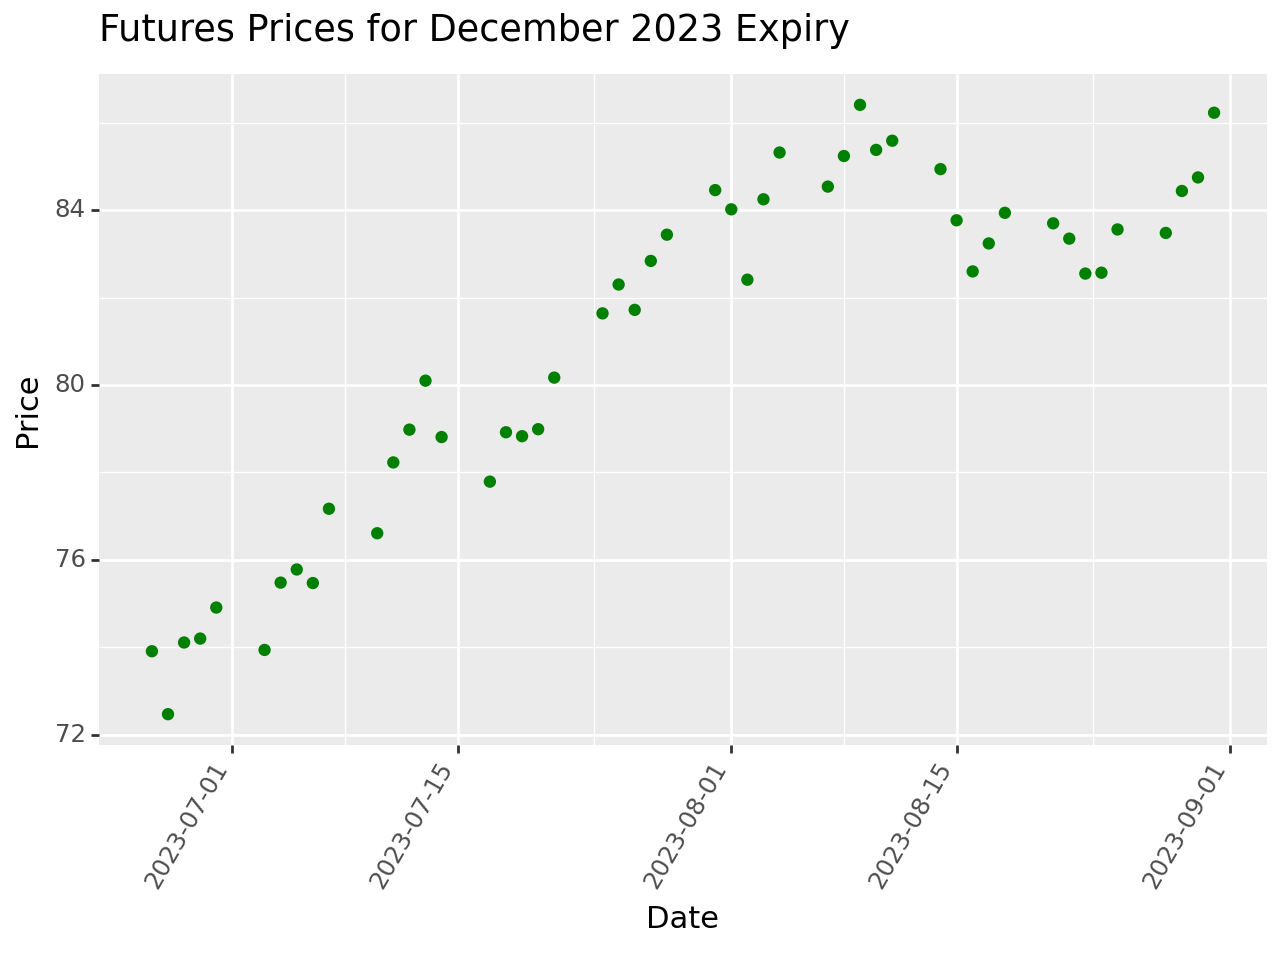

In [15]:
dec_2023_contracts = final_ice_b_b[final_ice_b_b['expiration'] == 'Z2023']

# Plotting the future prices using plotnine
plot = (p9.ggplot(data=dec_2023_contracts,
                  mapping=p9.aes(x='date', y='futures'))
         + p9.geom_point(color='green')
    + p9.theme(axis_text_x=p9.element_text(rotation=60, hjust=1))
        + p9.labs(title='Futures Prices for December 2023 Expiry',
                   x='Date',
                   y='Price'))
plot.draw()

In [16]:
ice_g_g = t_ivm.loc[(t_ivm.exchange_code=='ICE') & (t_ivm.futures_code=='G') & (t_ivm.option_code=='G')]
ice_g_g.head(5)

,exchange_code,futures_code,option_code,expiration,date,futures,atm,rr25,rr10,fly25,...,beta1,beta2,beta3,beta4,beta5,beta6,min_money,max_money,days_expiration,days_termination
781,ICE,G,G,Q2023,2023-07-27,854.25,0.319284,-0.021717,-0.068278,0.013616,...,-0.319582,15.458325,-40.106820,-1068.544846,2405.834800,38375.774626,-0.130151,0.095656,6.85,14.0
784,ICE,G,G,U2023,2023-07-27,840.00,0.291431,0.027806,0.053862,0.001622,...,0.212915,-0.033129,-0.020064,6.142741,-11.440204,-17.008828,-0.161119,0.223144,39.85,47.0
787,ICE,G,G,V2023,2023-07-27,829.25,0.326011,0.025594,0.048988,0.001743,...,0.135221,-0.037161,-0.316510,3.481253,0.725470,-17.838881,-0.243549,0.326996,69.85,77.0
790,ICE,G,G,X2023,2023-07-27,814.50,0.328021,0.030140,0.059290,0.002407,...,0.132983,-0.041797,-0.225503,2.507390,0.531043,-9.959726,-0.289115,0.408122,98.85,106.0
793,ICE,G,G,Z2023,2023-07-27,796.75,0.327099,0.002049,0.009202,0.004768,...,-0.004438,0.255959,0.031024,0.977594,0.308036,-3.004792,-0.417143,0.527319,130.85,138.0


In [17]:
ice_g_g_copy = ice_g_g.copy()

# Converting the date column to datetime in the futures data
ice_g_g_copy['date'] = pd.to_datetime(ice_g_g_copy['date'])

# Date range: 03 Dec 2020 to 31 Aug 2023
start_date = datetime(2020, 12, 3)
end_date = datetime(2023, 8, 31)

# Use .loc to modify the copy of the DataFrame
filtered_ice_g_g = ice_g_g_copy.loc[(ice_g_g_copy['date'] >= start_date) & (ice_g_g_copy['date'] <= end_date)]

#Filtering quarter wise
quarterly_expiration_symbols = ['H', 'M', 'U', 'Z']
pre_final_ice_g_g = filtered_ice_g_g[filtered_ice_g_g['expiration'].str[0].isin(quarterly_expiration_symbols)]

#Filtering second month contracts
final_ice_g_g = pre_final_ice_g_g[(pre_final_ice_g_g['days_expiration']>30)]
final_ice_g_g = final_ice_g_g.loc[final_ice_g_g.groupby('date')['days_expiration'].idxmin()]
final_ice_g_g


,exchange_code,futures_code,option_code,expiration,date,futures,atm,rr25,rr10,fly25,...,beta1,beta2,beta3,beta4,beta5,beta6,min_money,max_money,days_expiration,days_termination
3222923,ICE,G,G,H2021,2020-12-03,404.75,0.377799,-0.046897,-0.093657,0.003742,...,-0.197272,0.368820,0.288525,-1.045831,-0.758664,1.264430,-0.442588,0.351100,90.85,98.0
3222924,ICE,G,G,H2021,2020-12-04,406.00,0.379012,-0.047249,-0.094644,0.003823,...,-0.198592,0.379745,0.254675,-1.311176,-0.478532,2.795570,-0.445672,0.348017,89.85,97.0
3222925,ICE,G,G,H2021,2020-12-07,410.00,0.382357,-0.047298,-0.094844,0.003644,...,-0.200069,0.369966,0.248299,-1.088128,-0.426899,2.156216,-0.436427,0.346871,86.85,94.0
3222926,ICE,G,G,H2021,2020-12-08,409.75,0.375657,-0.047403,-0.095445,0.003729,...,-0.204182,0.389794,0.231478,-1.422499,-0.341754,3.332610,-0.435817,0.338823,85.85,93.0
3222927,ICE,G,G,H2021,2020-12-09,406.75,0.374841,-0.069072,-0.126562,0.002159,...,-0.307065,0.240010,1.129727,0.776946,-4.006904,-6.426638,-0.447517,0.319738,84.85,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65894,ICE,G,G,Z2023,2023-08-25,855.00,0.343146,0.013699,0.033533,0.006733,...,0.038945,0.346205,-0.019454,0.685156,0.304680,-3.004173,-0.379490,0.510826,108.85,102.0
458765,ICE,G,G,Z2023,2023-08-28,855.25,0.345362,0.013826,0.033440,0.006868,...,0.039791,0.360686,-0.041699,0.667262,0.455760,-3.164362,-0.379782,0.510533,105.85,99.0
461164,ICE,G,G,Z2023,2023-08-29,844.50,0.355246,0.011352,0.024308,0.005807,...,0.033755,0.295492,-0.185271,0.832195,1.063103,-3.736104,-0.384375,0.487464,104.85,98.0
462859,ICE,G,G,Z2023,2023-08-30,827.50,0.340506,0.006389,0.015485,0.002870,...,0.020130,0.139128,-0.055697,1.909416,0.575939,-7.535250,-0.355381,0.432292,103.85,97.0


In [18]:
null_values_summary1= final_ice_g_g.isnull().sum()
null_values_summary1

exchange_code         0
futures_code          0
option_code           0
expiration            0
date                  0
futures               0
atm                   0
rr25                 36
rr10                106
fly25                36
fly10               106
beta1                 0
beta2                 0
beta3                 0
beta4                 0
beta5                 0
beta6                 0
min_money             0
max_money             0
days_expiration       0
days_termination      0
dtype: int64

Plotting the September 2023 expiry contracts for ICE_G_G futures data.

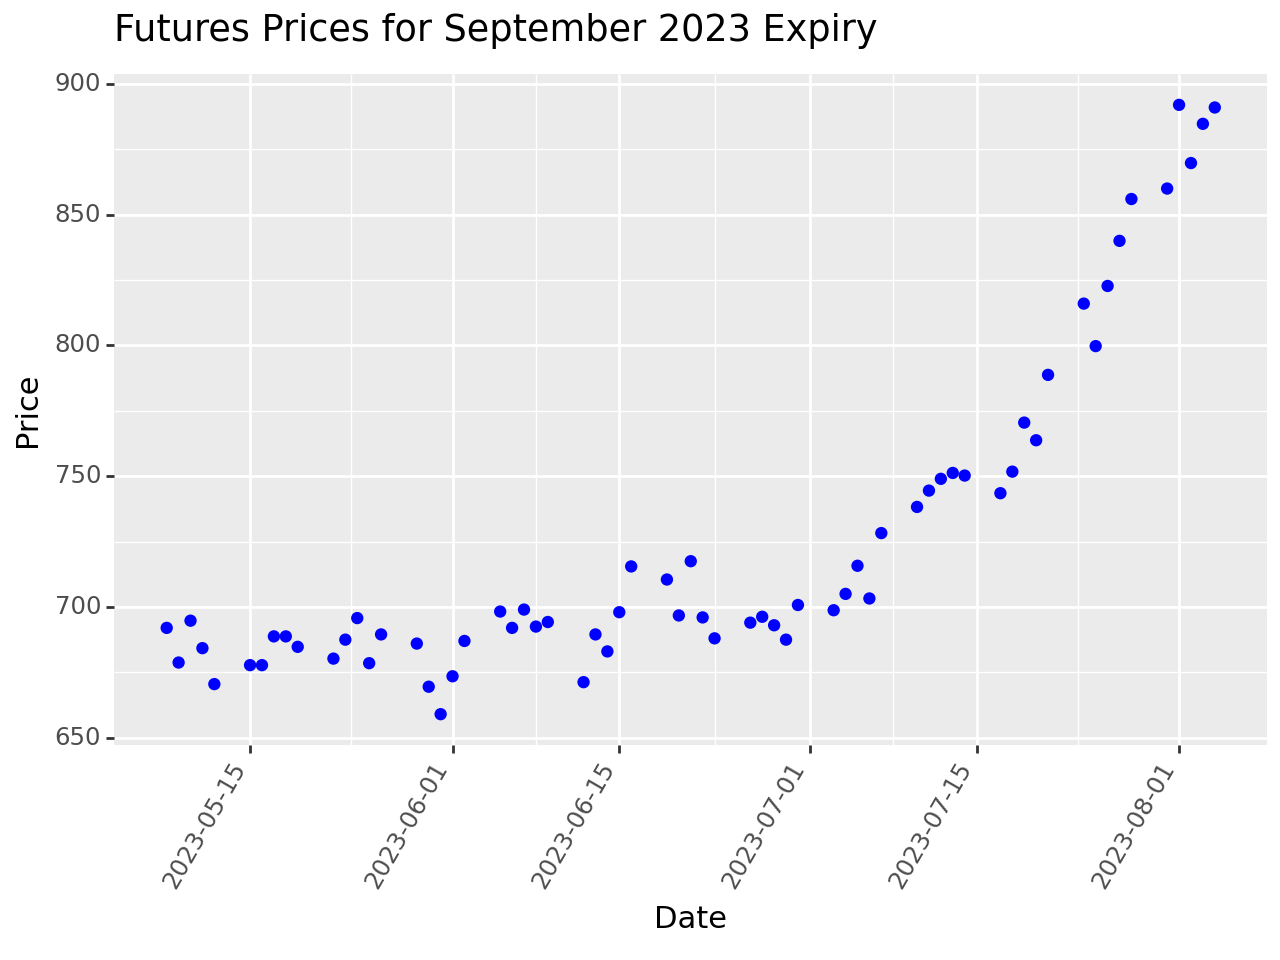

In [19]:
sept_2023_contracts = final_ice_g_g[final_ice_g_g['expiration'] == 'U2023']

# Plotting the future prices using plotnine
plot = (p9.ggplot(data=sept_2023_contracts,
                  mapping=p9.aes(x='date', y='futures'))
         + p9.geom_point(color='blue')
    + p9.theme(axis_text_x=p9.element_text(rotation=60, hjust=1))
        + p9.labs(title='Futures Prices for September 2023 Expiry',
                   x='Date',
                   y='Price'))
plot.draw()

In [21]:
cbt_fv_fv = t_ivm.loc[(t_ivm.exchange_code=='CBT') & (t_ivm.futures_code=='FV') & (t_ivm.option_code=='FV')]
cbt_fv_fv.head(5)

,exchange_code,futures_code,option_code,expiration,date,futures,atm,rr25,rr10,fly25,...,beta1,beta2,beta3,beta4,beta5,beta6,min_money,max_money,days_expiration,days_termination
77,CBT,FV,FV,1M,2023-07-27,106.324433,0.054444,-0.004490,-0.006964,0.001364,...,-0.223466,11.502845,209.467894,-3962.438433,-6.819589e+04,1.847851e+06,-0.042694,0.035050,31.0,31.0
78,CBT,FV,FV,1W,2023-07-27,106.174021,0.054303,-0.004897,-0.008368,0.001517,...,-0.491568,56.561838,1570.003114,-133481.221854,-2.303125e+06,2.744504e+08,-0.020320,0.015586,7.0,7.0
79,CBT,FV,FV,1Y,2023-07-27,108.603472,0.049204,-0.000434,0.002925,0.000115,...,-0.023631,-0.056212,18.485319,173.688767,-1.868961e+03,-1.856884e+04,-0.098165,0.078311,366.0,366.0
80,CBT,FV,FV,2M,2023-07-27,106.518716,0.054583,-0.003348,-0.005155,0.001671,...,-0.117779,7.433890,51.423069,-2238.017668,-6.114996e+03,4.721466e+05,-0.058966,0.053280,62.0,62.0
81,CBT,FV,FV,3M,2023-07-27,106.706731,0.054486,-0.002531,-0.004186,0.001619,...,-0.074374,4.889776,20.160100,-768.550406,-1.884680e+03,9.820736e+04,-0.071533,0.066709,92.0,92.0


In [22]:
cbt_fv_fv_copy = cbt_fv_fv.copy()

# Converting the date column to datetime in the futures data
cbt_fv_fv_copy['date'] = pd.to_datetime(cbt_fv_fv_copy['date'])

# Date range: 03 Dec 2020 to 31 Aug 2023
start_date = datetime(2020, 12, 3)
end_date = datetime(2023, 8, 31)

# Use .loc to modify the copy of the DataFrame
filtered_cbt_fv_fv = cbt_fv_fv_copy.loc[(cbt_fv_fv_copy['date'] >= start_date) & (cbt_fv_fv_copy['date'] <= end_date)]

#Filtering quarter wise
quarterly_expiration_symbols = ['H', 'M', 'U', 'Z']
pre_final_cbt_fv_fv = filtered_cbt_fv_fv[filtered_cbt_fv_fv['expiration'].str[0].isin(quarterly_expiration_symbols)]

#Filtering second month contracts
final_cbt_fv_fv = pre_final_cbt_fv_fv[(pre_final_cbt_fv_fv['days_expiration']>30)]
final_cbt_fv_fv = final_cbt_fv_fv.loc[final_cbt_fv_fv.groupby('date')['days_expiration'].idxmin()]
final_cbt_fv_fv




,exchange_code,futures_code,option_code,expiration,date,futures,atm,rr25,rr10,fly25,...,beta1,beta2,beta3,beta4,beta5,beta6,min_money,max_money,days_expiration,days_termination
836112,CBT,FV,FV,H2021,2020-12-03,125.820312,0.014578,-0.003193,-0.005851,0.000532,...,-0.354760,17.381571,1525.888693,39084.450818,-1.945236e+06,-6.152988e+07,-0.025112,0.014829,78.21,118.0
836113,CBT,FV,FV,H2021,2020-12-04,125.734375,0.015127,-0.003152,-0.006969,0.000349,...,-0.325909,7.296449,218.773127,69446.977867,3.335101e+06,4.647199e+07,-0.032613,0.013945,77.21,117.0
836114,CBT,FV,FV,H2021,2020-12-07,125.898438,0.014720,-0.003138,-0.006466,0.000565,...,-0.342183,19.489382,1061.329291,31370.239321,-5.827276e+05,-2.546094e+07,-0.027365,0.016555,74.21,114.0
836115,CBT,FV,FV,H2021,2020-12-08,125.906250,0.014365,-0.003170,-0.006619,0.000617,...,-0.353727,23.022102,1205.821426,29459.231464,-6.524425e+05,-2.397150e+07,-0.027427,0.012579,73.21,113.0
836116,CBT,FV,FV,H2021,2020-12-09,125.812500,0.014682,-0.003623,-0.006777,0.000442,...,-0.420633,11.294032,1734.600142,94705.389002,-1.110372e+06,-9.820890e+07,-0.025050,0.013324,72.21,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65132,CBT,FV,FV,Z2023,2023-08-25,106.171875,0.048792,-0.001328,-0.000745,0.001730,...,-0.052525,6.512171,44.177937,-1288.511604,-9.095488e+03,1.774630e+05,-0.064902,0.059670,91.21,126.0
457996,CBT,FV,FV,Z2023,2023-08-28,106.281250,0.049512,-0.000668,-0.000291,0.001016,...,-0.028110,3.772555,24.658221,-149.726542,-4.723588e+03,7.830965e+04,-0.060919,0.061299,88.21,123.0
460392,CBT,FV,FV,Z2023,2023-08-29,106.765625,0.049618,-0.000159,0.000864,0.000906,...,-0.013818,3.275588,28.271453,315.162350,-7.662674e+03,-3.073083e+04,-0.058490,0.061167,87.21,122.0
462083,CBT,FV,FV,Z2023,2023-08-30,106.804688,0.049548,0.000595,0.001619,0.000773,...,0.014308,2.716426,6.724729,717.295329,-3.033026e+03,-1.068101e+05,-0.058856,0.060801,86.21,121.0


In [23]:
null_values_summary2 = final_cbt_fv_fv.isnull().sum()
null_values_summary2

exchange_code       0
futures_code        0
option_code         0
expiration          0
date                0
futures             0
atm                 0
rr25                0
rr10                0
fly25               0
fly10               0
beta1               0
beta2               0
beta3               0
beta4               0
beta5               0
beta6               0
min_money           0
max_money           0
days_expiration     0
days_termination    0
dtype: int64

Plotting the June 2023 expiry contracts for CBT_FV_FV futures data.

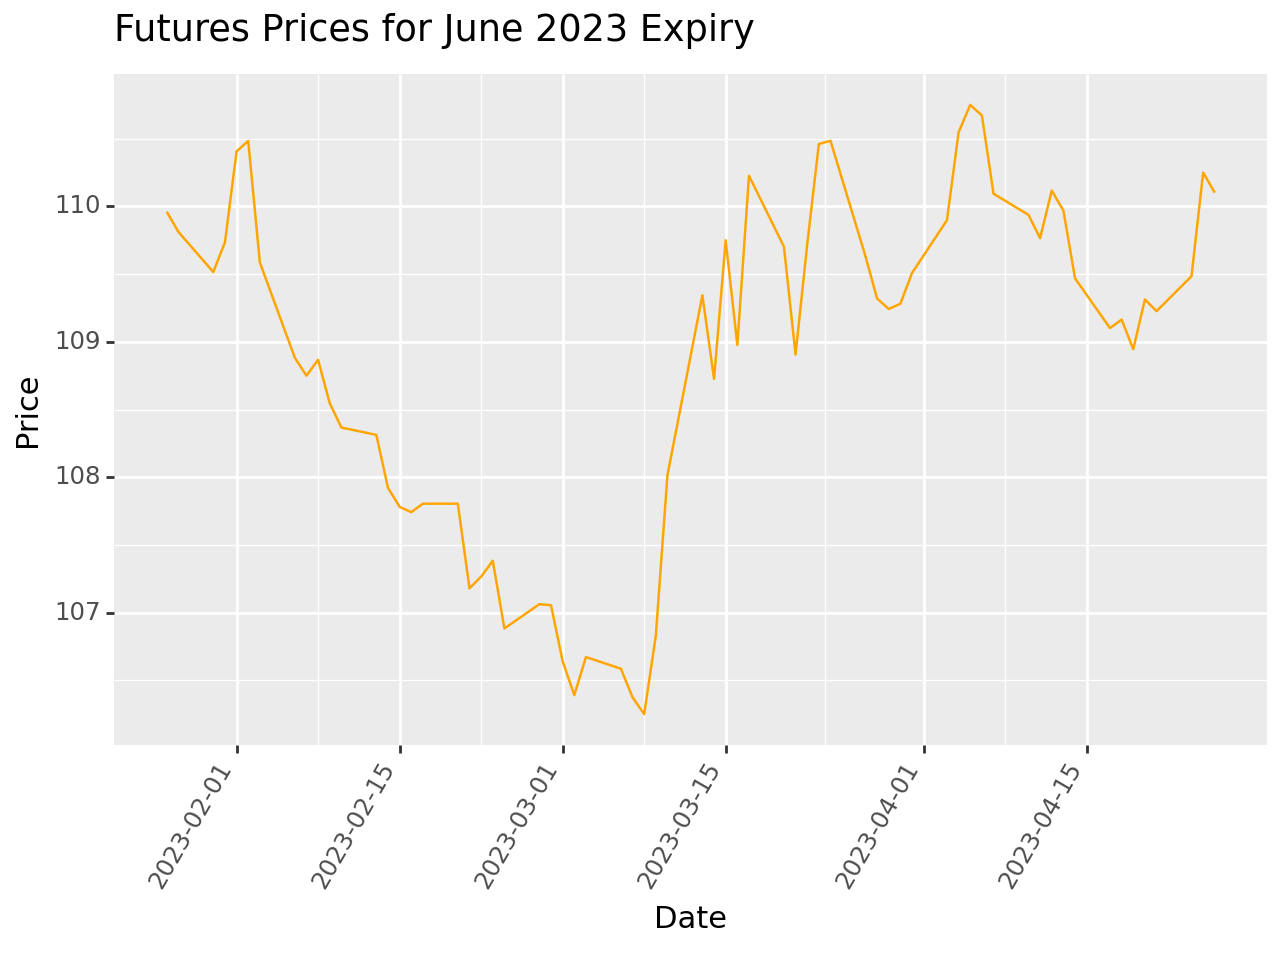

In [24]:
june_2023_contracts = final_cbt_fv_fv[final_cbt_fv_fv['expiration'] == 'M2023']

# Plotting the future prices using plotnine
plot = (p9.ggplot(data=june_2023_contracts,
                  mapping=p9.aes(x='date', y='futures'))
         + p9.geom_line(color='orange')
    + p9.theme(axis_text_x=p9.element_text(rotation=60, hjust=1))
        + p9.labs(title='Futures Prices for June 2023 Expiry',
                   x='Date',
                   y='Price'))
plot.draw()

In [25]:
cbt_tu_tu = t_ivm.loc[(t_ivm.exchange_code=='CBT') & (t_ivm.futures_code=='TU') & (t_ivm.option_code=='TU')]
cbt_tu_tu.head(5)

,exchange_code,futures_code,option_code,expiration,date,futures,atm,rr25,rr10,fly25,...,beta1,beta2,beta3,beta4,beta5,beta6,min_money,max_money,days_expiration,days_termination
150,CBT,TU,TU,1M,2023-07-27,101.234306,0.027542,-0.003615,-0.002843,-0.000494,...,-0.478893,-29.508679,5073.538288,4.014231e+05,-1.568727e+07,-1.062760e+09,-0.016474,0.014073,31.0,31.0
151,CBT,TU,TU,1W,2023-07-27,101.102438,0.027553,-0.004686,-0.002836,-0.000379,...,-1.424591,-132.978231,86568.059315,1.212802e+07,-1.549111e+09,-1.950870e+11,-0.007862,0.006018,7.0,7.0
152,CBT,TU,TU,1Y,2023-07-27,103.380903,0.026968,-0.000664,-0.000723,0.000042,...,-0.023249,0.285947,13.439628,-5.212619e+02,-2.133499e+03,1.967234e+05,-0.050252,0.055862,366.0,366.0
153,CBT,TU,TU,2M,2023-07-27,101.404636,0.027467,-0.001611,-0.000967,-0.000246,...,-0.148343,-5.730770,759.123114,2.258556e+04,-9.477929e+05,-1.266757e+07,-0.021767,0.021973,62.0,62.0
154,CBT,TU,TU,3M,2023-07-27,101.569471,0.027071,-0.001153,-0.001054,-0.000446,...,-0.083600,-7.013638,239.137074,1.746003e+04,-1.898087e+05,-1.132690e+07,-0.025974,0.025974,92.0,92.0


In [26]:
cbt_tu_tu_copy = cbt_tu_tu.copy()

# Converting the date column to datetime in the futures data
cbt_tu_tu_copy['date'] = pd.to_datetime(cbt_tu_tu_copy['date'])

# Date range: 03 Dec 2020 to 31 Aug 2023
start_date = datetime(2020, 12, 3)
end_date = datetime(2023, 8, 31)

# Use .loc to modify the copy of the DataFrame
filtered_cbt_tu_tu = cbt_tu_tu_copy.loc[(cbt_tu_tu_copy['date'] >= start_date) & (cbt_tu_tu_copy['date'] <= end_date)]

#Filtering quarter wise
quarterly_expiration_symbols = ['H', 'M', 'U', 'Z']
pre_final_cbt_tu_tu = filtered_cbt_tu_tu[filtered_cbt_tu_tu['expiration'].str[0].isin(quarterly_expiration_symbols)]

#Filtering second month contracts
final_cbt_tu_tu = pre_final_cbt_tu_tu[(pre_final_cbt_tu_tu['days_expiration']>30)]
final_cbt_tu_tu = final_cbt_tu_tu.loc[final_cbt_tu_tu.groupby('date')['days_expiration'].idxmin()]
final_cbt_tu_tu


,exchange_code,futures_code,option_code,expiration,date,futures,atm,rr25,rr10,fly25,...,beta1,beta2,beta3,beta4,beta5,beta6,min_money,max_money,days_expiration,days_termination
1082241,CBT,TU,TU,H2021,2020-12-03,110.393750,0.003442,NaN,NaN,NaN,...,-1.140115,-32.973836,293342.287634,0.000000,0.000000,0.000000e+00,-0.001757,0.000962,78.21,118.0
1082242,CBT,TU,TU,H2021,2020-12-04,110.400000,0.003673,NaN,NaN,NaN,...,-0.956040,0.213300,259972.823759,0.000000,0.000000,0.000000e+00,-0.001813,0.000905,77.21,117.0
1082243,CBT,TU,TU,H2021,2020-12-07,110.421875,0.003353,NaN,NaN,NaN,...,-1.074610,78.929198,198780.330911,0.000000,0.000000,0.000000e+00,-0.002011,0.000707,74.21,114.0
1082244,CBT,TU,TU,H2021,2020-12-08,110.406250,0.003728,NaN,NaN,NaN,...,-1.117527,32.970569,289109.253844,0.000000,0.000000,0.000000e+00,-0.001870,0.000849,73.21,113.0
1082245,CBT,TU,TU,H2021,2020-12-09,110.400000,0.003574,NaN,NaN,NaN,...,-0.618364,0.097337,118635.924807,0.000000,0.000000,0.000000e+00,-0.001813,0.000905,72.21,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65202,CBT,TU,TU,Z2023,2023-08-25,101.603125,0.022032,-0.000541,0.000099,0.000311,...,-0.053132,5.603686,326.132218,688.789058,-346997.257367,4.323264e+06,-0.028989,0.028113,91.21,126.0
458069,CBT,TU,TU,Z2023,2023-08-28,101.625000,0.021980,-0.000557,0.000387,0.000241,...,-0.061232,4.444405,469.118803,2129.536982,-589415.916160,6.474426e+06,-0.025160,0.025982,88.21,123.0
460465,CBT,TU,TU,Z2023,2023-08-29,101.853125,0.023263,-0.000084,0.000937,-0.000239,...,-0.023411,-5.781147,349.108122,27102.166690,-459141.741986,-1.043012e+07,-0.025386,0.028522,87.21,122.0
462156,CBT,TU,TU,Z2023,2023-08-30,101.875000,0.023530,0.000533,0.001345,-0.000329,...,0.032424,-7.995146,87.659816,37066.989435,-194803.534182,-2.181522e+07,-0.026609,0.027353,86.21,121.0


In [27]:
null_values_summary3 = final_cbt_tu_tu.isnull().sum()
null_values_summary3

exchange_code         0
futures_code          0
option_code           0
expiration            0
date                  0
futures               0
atm                   0
rr25                 98
rr10                169
fly25                98
fly10               169
beta1                 0
beta2                 0
beta3                 0
beta4                 0
beta5                 0
beta6                 0
min_money             0
max_money             0
days_expiration       0
days_termination      0
dtype: int64

Plotting the March 2023 expiry contracts for CBT_TU_TU futures data.

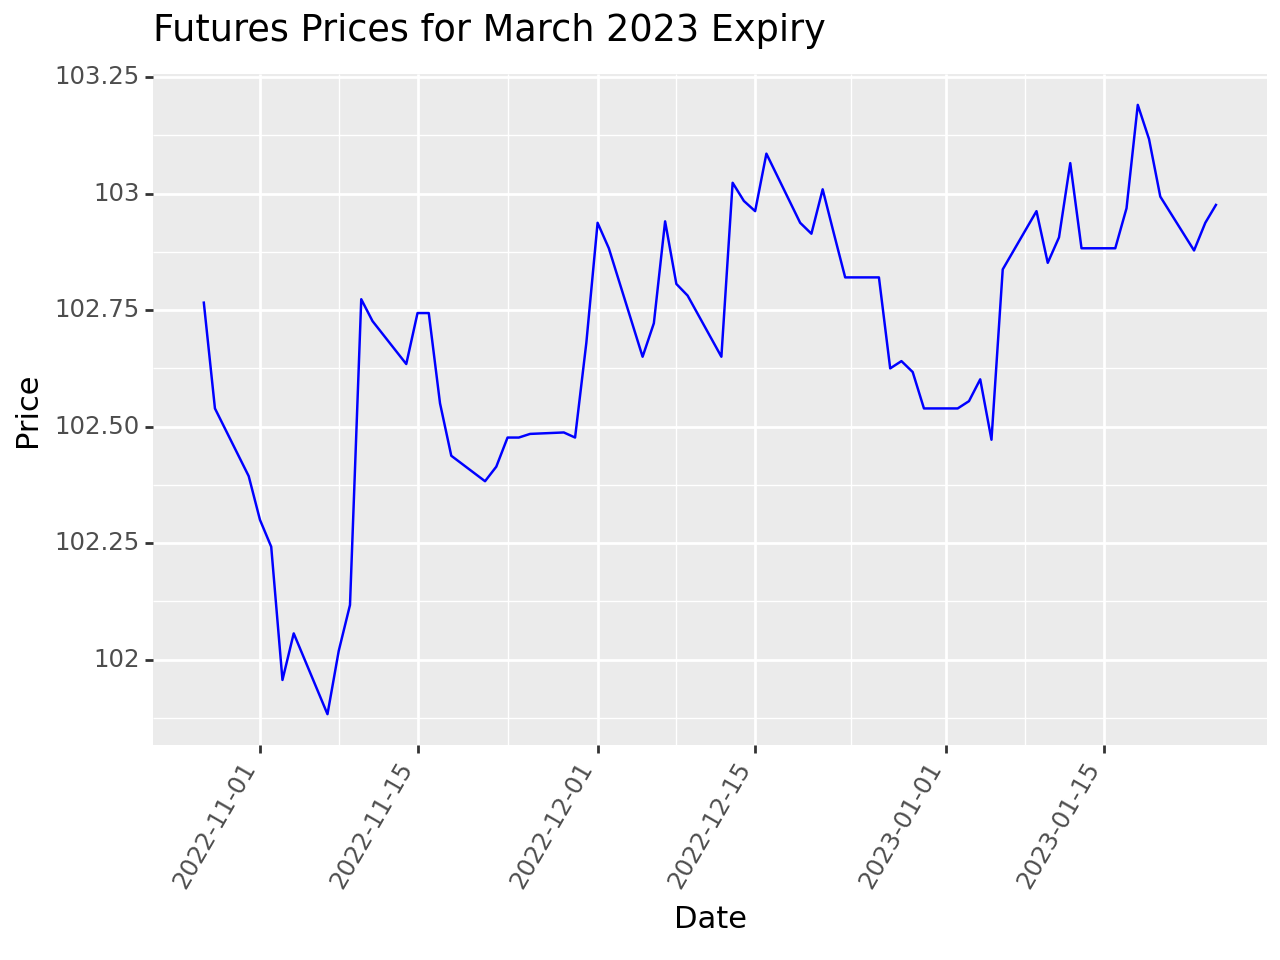

In [28]:
mar_2023_contracts = final_cbt_tu_tu[final_cbt_tu_tu['expiration'] == 'H2023']

# Plotting the future prices using plotnine
plot = (p9.ggplot(data=mar_2023_contracts,
                  mapping=p9.aes(x='date', y='futures'))
         + p9.geom_line(color='blue')
    + p9.theme(axis_text_x=p9.element_text(rotation=60, hjust=1))
        + p9.labs(title='Futures Prices for March 2023 Expiry',
                   x='Date',
                   y='Price'))
plot.draw()

3. Calculating and analysing the spreads for both the pairs

#Defining function to calculate spreads. Calculating spread between ICE_B_B and ICE_G_G.

In [29]:
def spreads_calculation_1(df1, df2, spreads_name):
    
    merged_data = pd.merge(df1[['date', 'futures']], df2[['date', 'futures']], on='date', suffixes=('_df1', '_df2'))

    # Calculate the spreads (spread multiplier is 0.1147)
    spreads = (merged_data['futures_df1'] - merged_data['futures_df2'])*0.1147

    result_df = pd.DataFrame({'date': merged_data['date'], f'{spreads_name}': spreads})

    return result_df


In [30]:
st1 = spreads_calculation_1(final_ice_g_g, final_ice_b_b, 'spread_ice_g_g_vs_ice_b_b')
st1

,date,spread_ice_g_g_vs_ice_b_b
0,2020-12-03,40.850405
1,2020-12-04,40.926107
2,2020-12-07,41.429640
3,2020-12-08,41.399818
4,2020-12-09,41.060306
...,...,...
704,2023-08-25,88.484168
705,2023-08-28,88.522019
706,2023-08-29,87.178882
707,2023-08-30,85.193425


Now, analysing the spread with various plots. First, is a line chart in which we are comparing the spread with the 30-day rolling average of spread.

C:\Users\nihar\AppData\Local\Temp\ipykernel_27888\2650984132.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


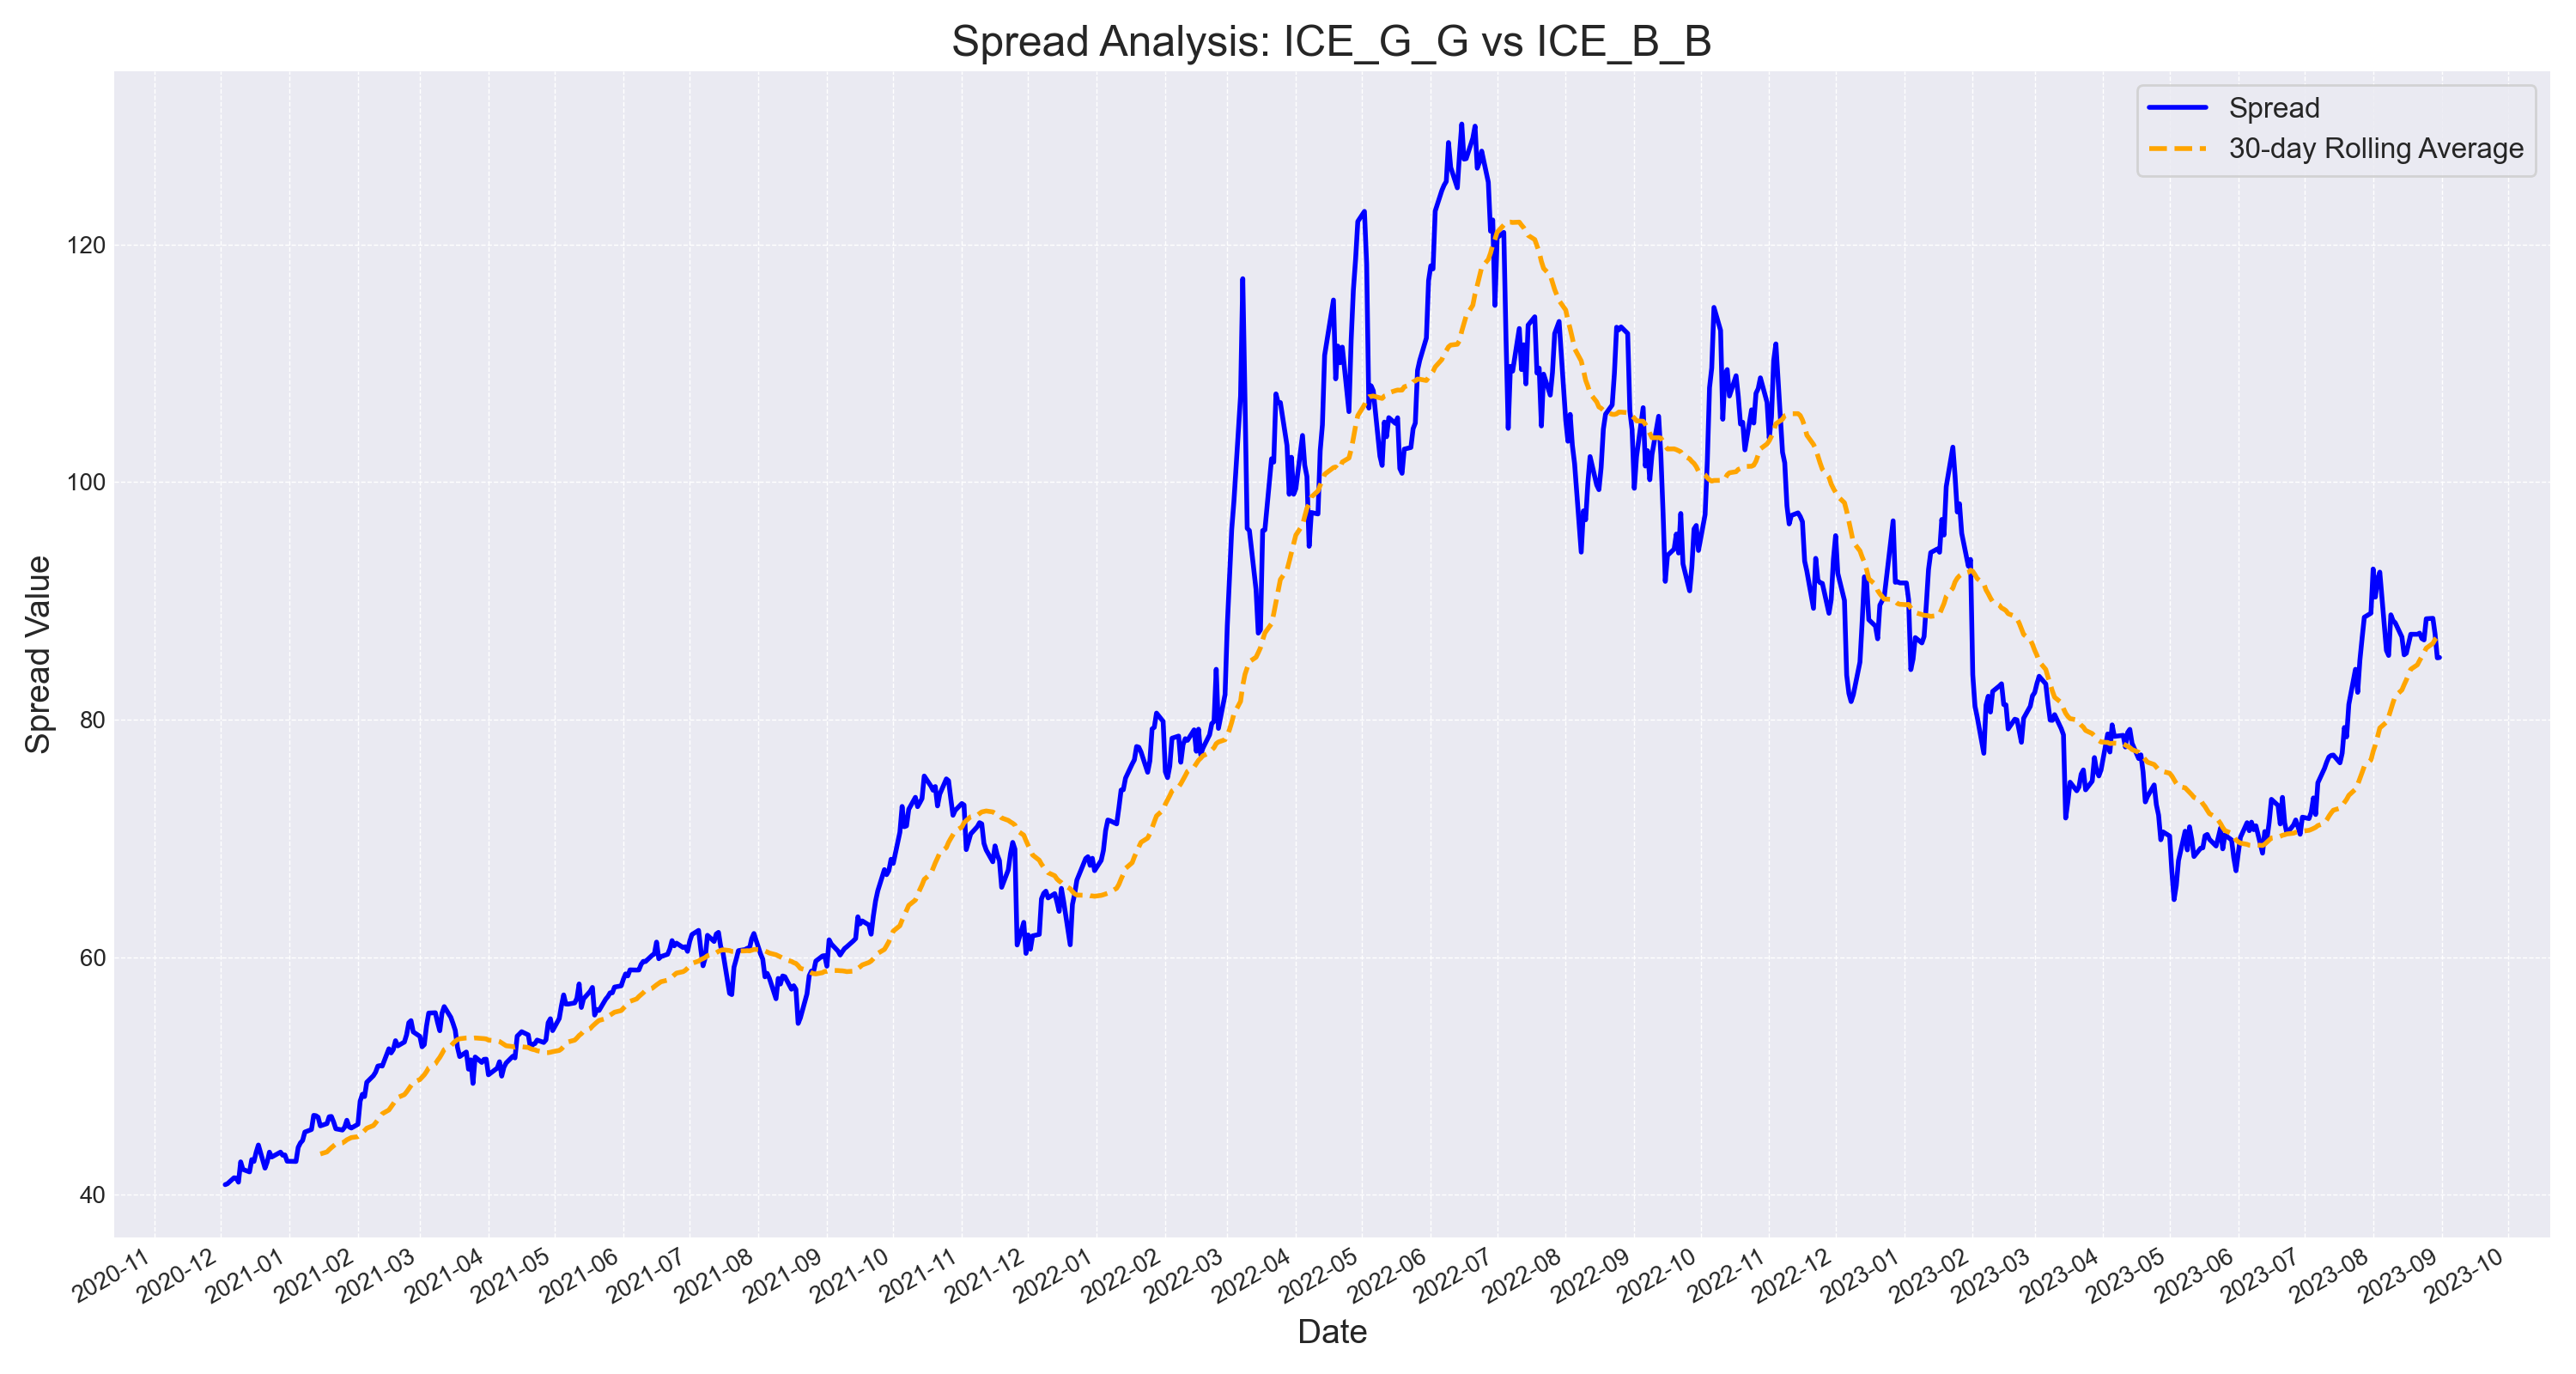

In [31]:
# Line Chart with 30-day Rolling Average
st1['rolling_average_30'] = st1['spread_ice_g_g_vs_ice_b_b'].rolling(window=30).mean()


plt.style.use('seaborn-darkgrid') 
plt.figure(figsize=(15, 8))

plt.plot(st1['date'], st1['spread_ice_g_g_vs_ice_b_b'], label='Spread', linewidth=2, color='blue')
plt.plot(st1['date'], st1['rolling_average_30'], label='30-day Rolling Average', linestyle='--', linewidth=2, color='orange')

# Add titles and labels
plt.title('Spread Analysis: ICE_G_G vs ICE_B_B', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Spread Value', fontsize=14)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()  # Rotation
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(frameon=True, fontsize=12)
plt.tight_layout()

plt.show()


In the Spread Analysis plot we can conclude some points as follows:
1. We can see the spread gives significant volatility with several peaks and troughs but the rolling day average provides a smooth curve that tells that there is a clear trend.
2. The spread shows mean-reverting behavior which can be seen by the behaviour of the spread around the rolling average. After reaching the extremes the spread retreat back towards the rolling average. 
3. Regular peaks  and troughs may suggest possible seasonal patterns and cyclical behavior.  
4. The volatility of the spread isn't constant; there are periods of higher and lower volatility. It can be seen from the spread's fluctuations around mid-2022 and late 2022/early 2023

Now, let's see the histogram of the spread values:

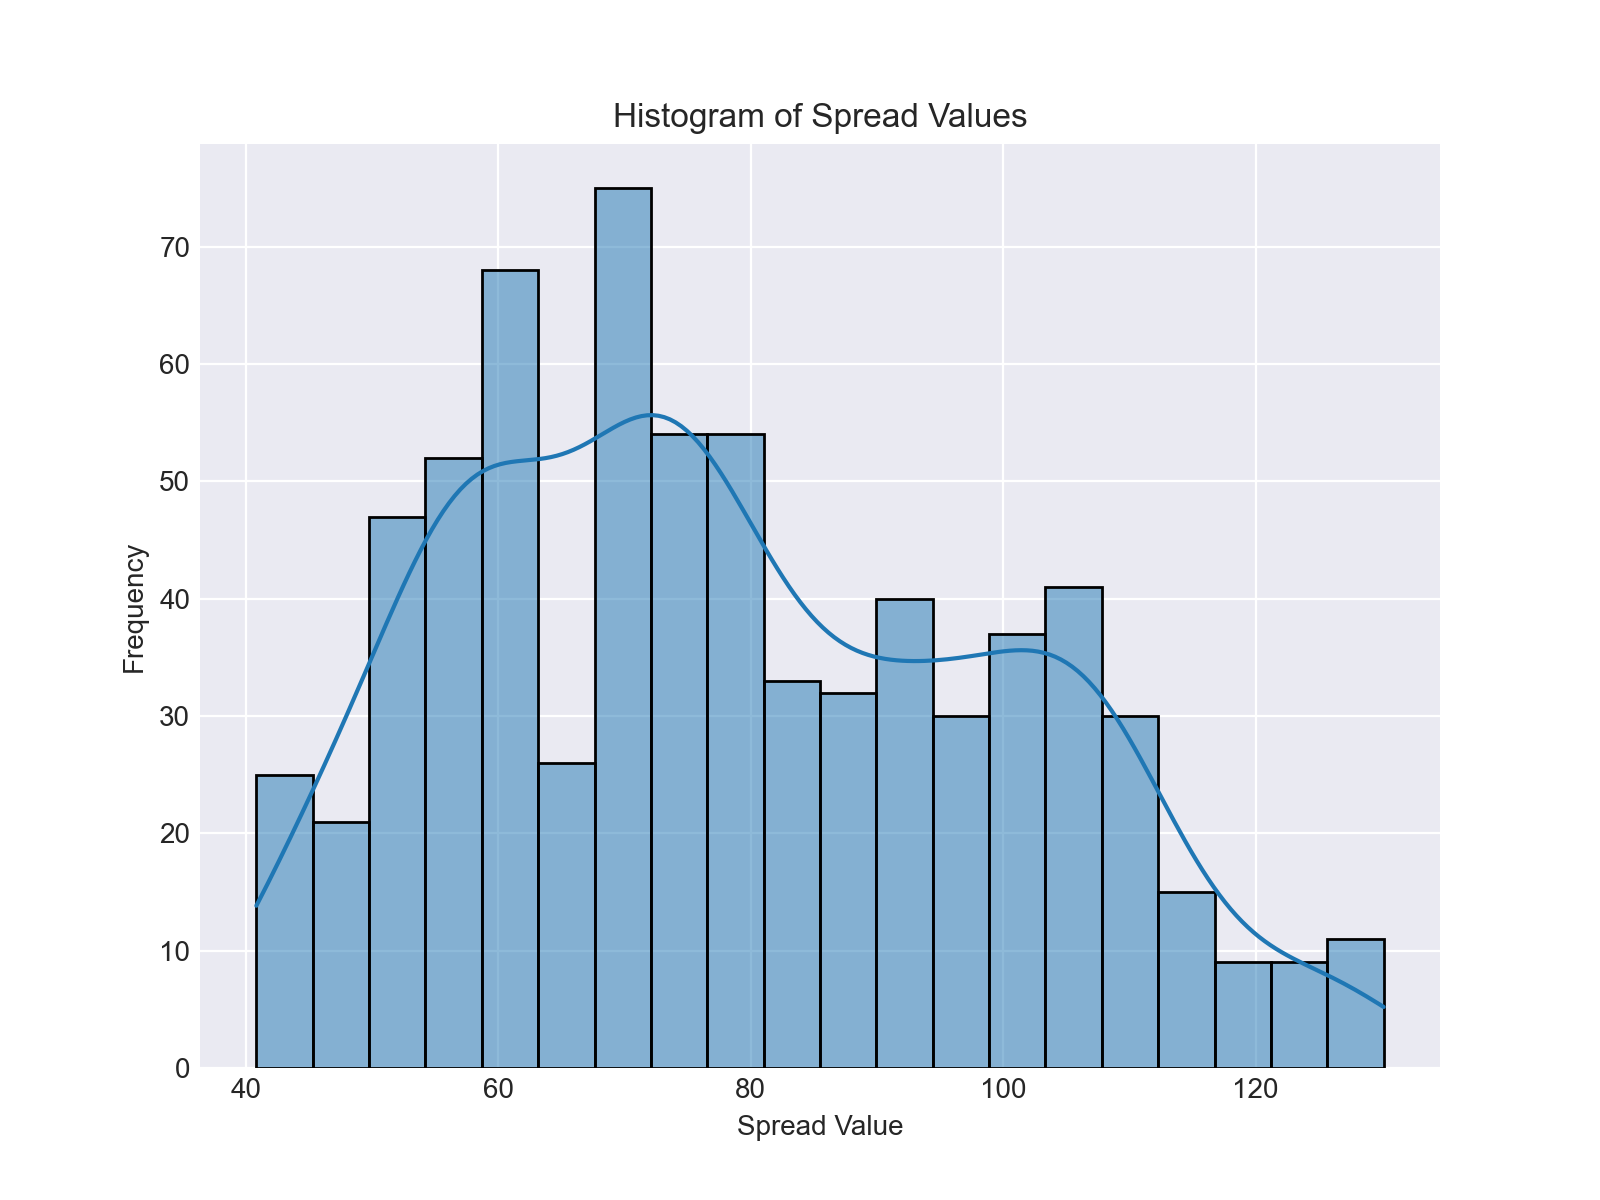

In [32]:
# Histogram of Spread Values
plt.figure(figsize=(8, 6))
sns.histplot(st1['spread_ice_g_g_vs_ice_b_b'], bins=20, kde=True)
plt.title('Histogram of Spread Values')
plt.xlabel('Spread Value')
plt.ylabel('Frequency')
plt.show()

The distribution appears to be roughly bell-shaped, indicating a normal-like distribution, but with some potential skewness as there are bars to the right that might suggest a tail. There are fewer occurrences of spread values at the extreme ends of the histogram, particularly above 120. These could be outliers or simply less common values in the dataset. The curve that overlays the histogram smooths out the frequencies of the spread values, which helps to visualize the density of the data points more clearly. The peak of the KDE curve coincides with the most frequently occurring spread values. 

Quantile-Quantile plot (Q-Q plot)

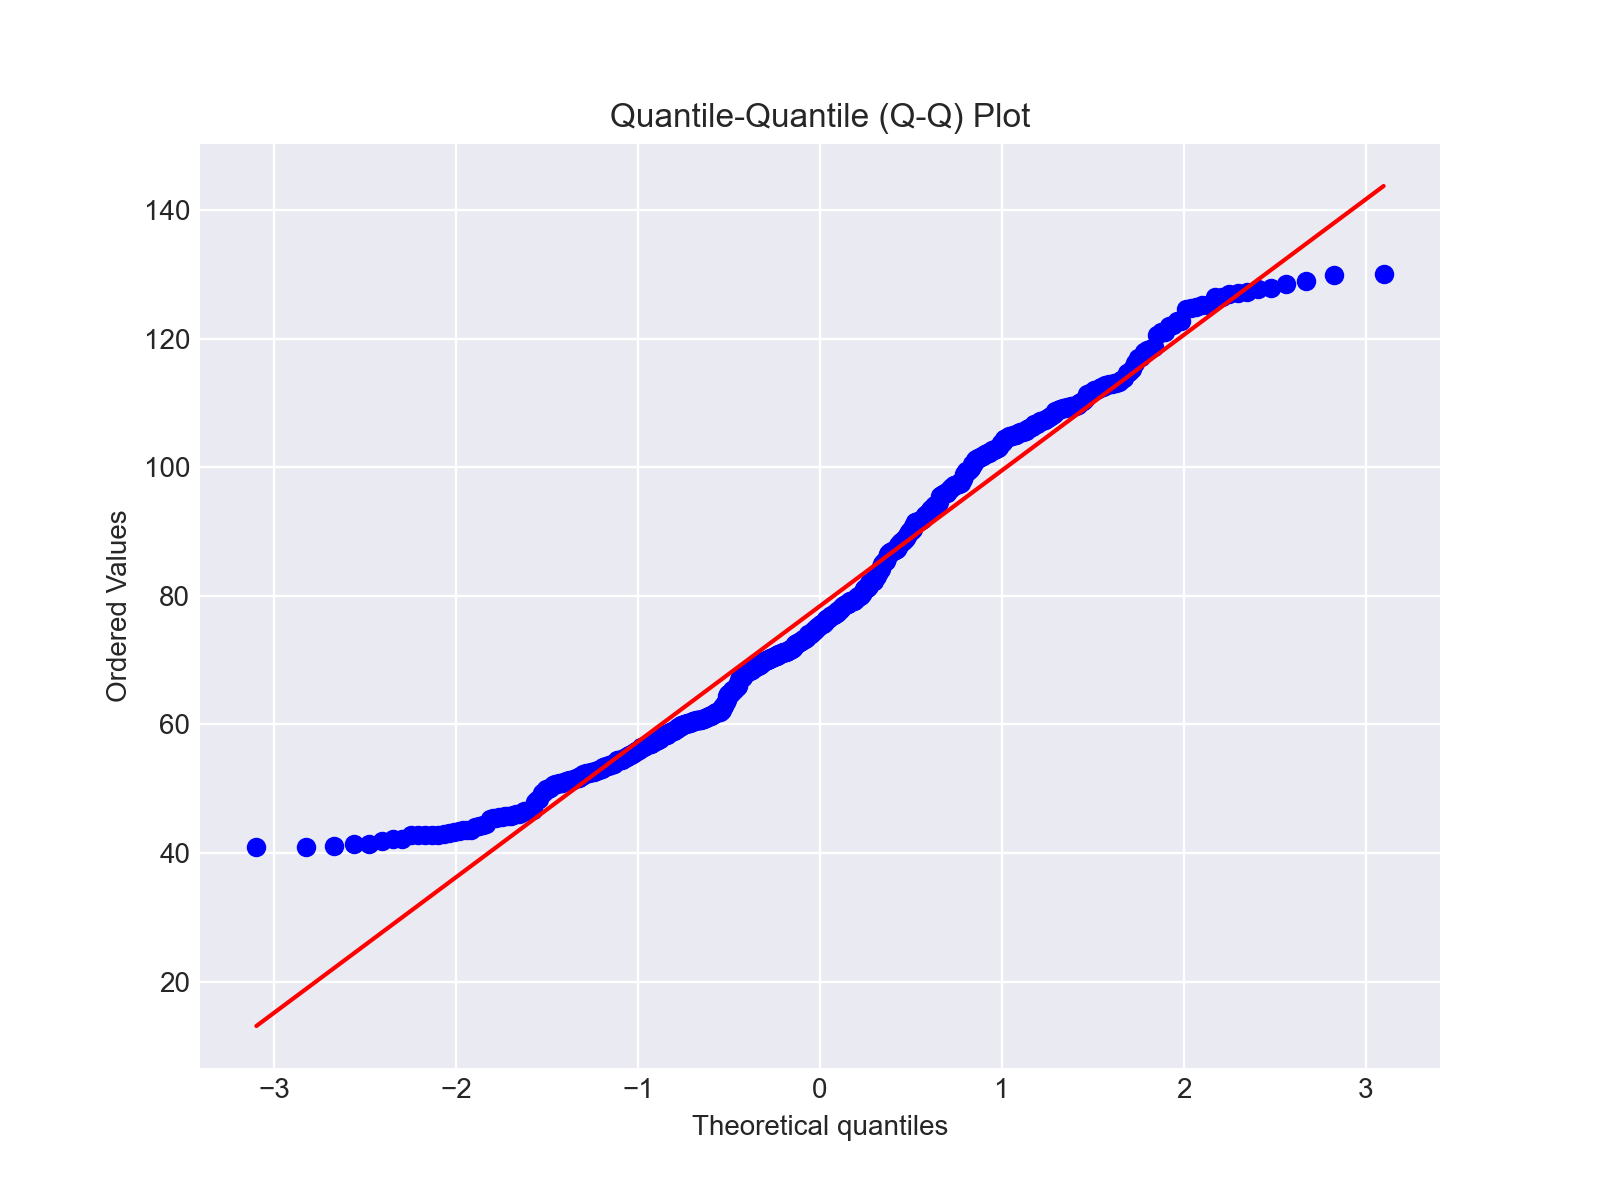

In [33]:
# Quantile-Quantile (Q-Q) Plot
plt.figure(figsize=(8, 6))
probplot(st1['spread_ice_g_g_vs_ice_b_b'], plot=plt)
plt.title('Quantile-Quantile (Q-Q) Plot')
plt.show()

The Q-Q plot is typically used to determine if data follows a normal distribution. In this plot, the points at the ends of the distribution deviate from the reference line. The lower tail (left-hand side) and the upper tail (right-hand side) show the data points veering off from the line, suggesting that the data may have heavier tails than a normal distribution. The central portion of the Q-Q plot (around the theoretical quantiles of -1 to 1) follows the reference line fairly closely, which indicates that the middle part of the data distribution can be approximated by a normal distribution. However, the tails do not, which is where the data distribution diverges from normality.

Let's look at the autocorrelation plot:

<Figure size 1000x600 with 0 Axes>

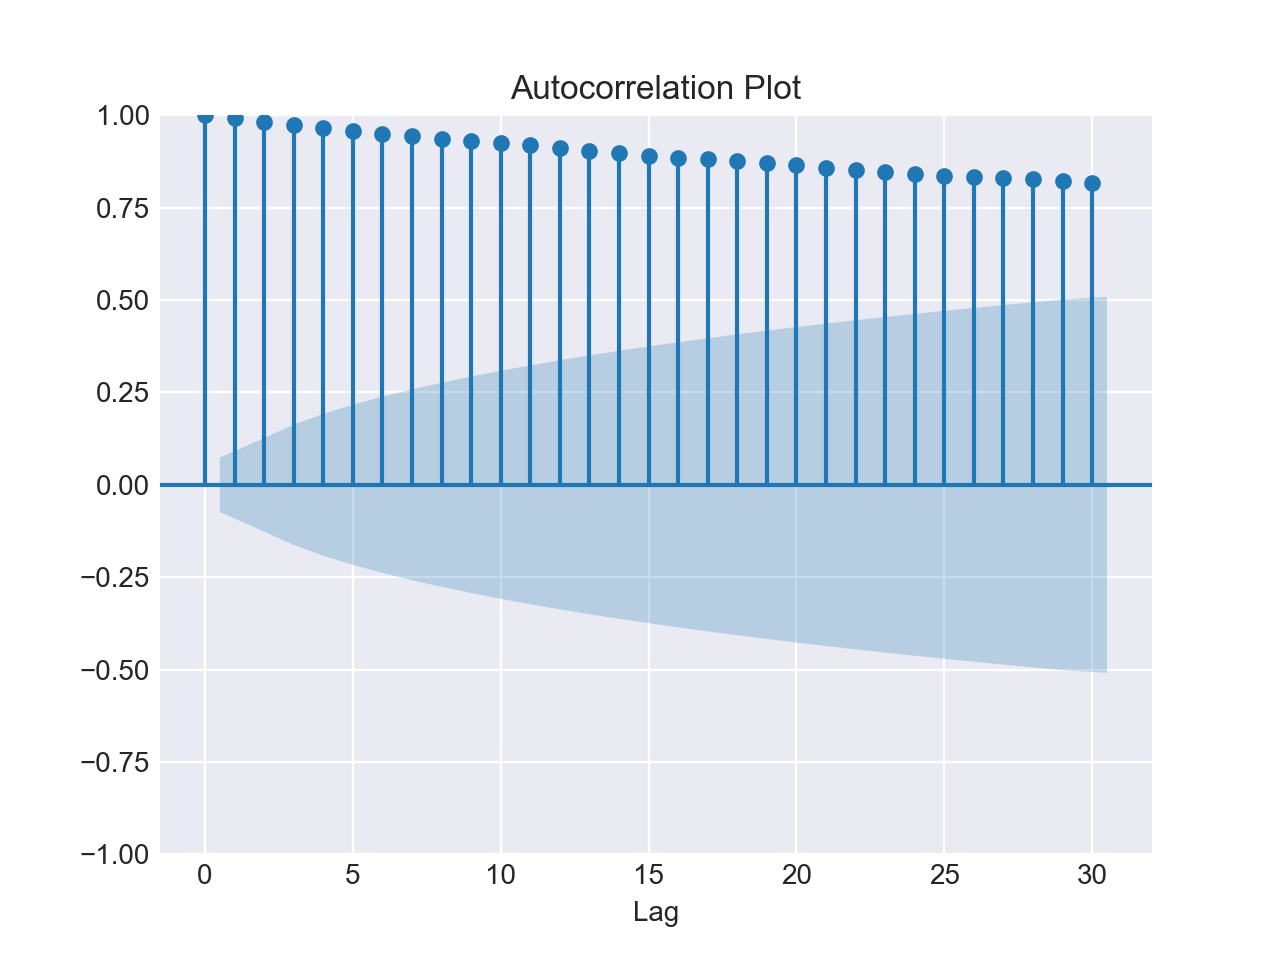

In [34]:
# Autocorrelation Plot
plt.figure(figsize=(10, 6))
plot_acf(st1['spread_ice_g_g_vs_ice_b_b'], lags=30)
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.show()

The plot indicates that there is a significant positive autocorrelation at various lag intervals, given the spikes that extend above the confidence band (the shaded area). This suggests that past values of the time series have a strong positive relationship with future values up to a certain number of lags.

Let's look at the median and standard deviation variation of spread 1 with different rolling day average.

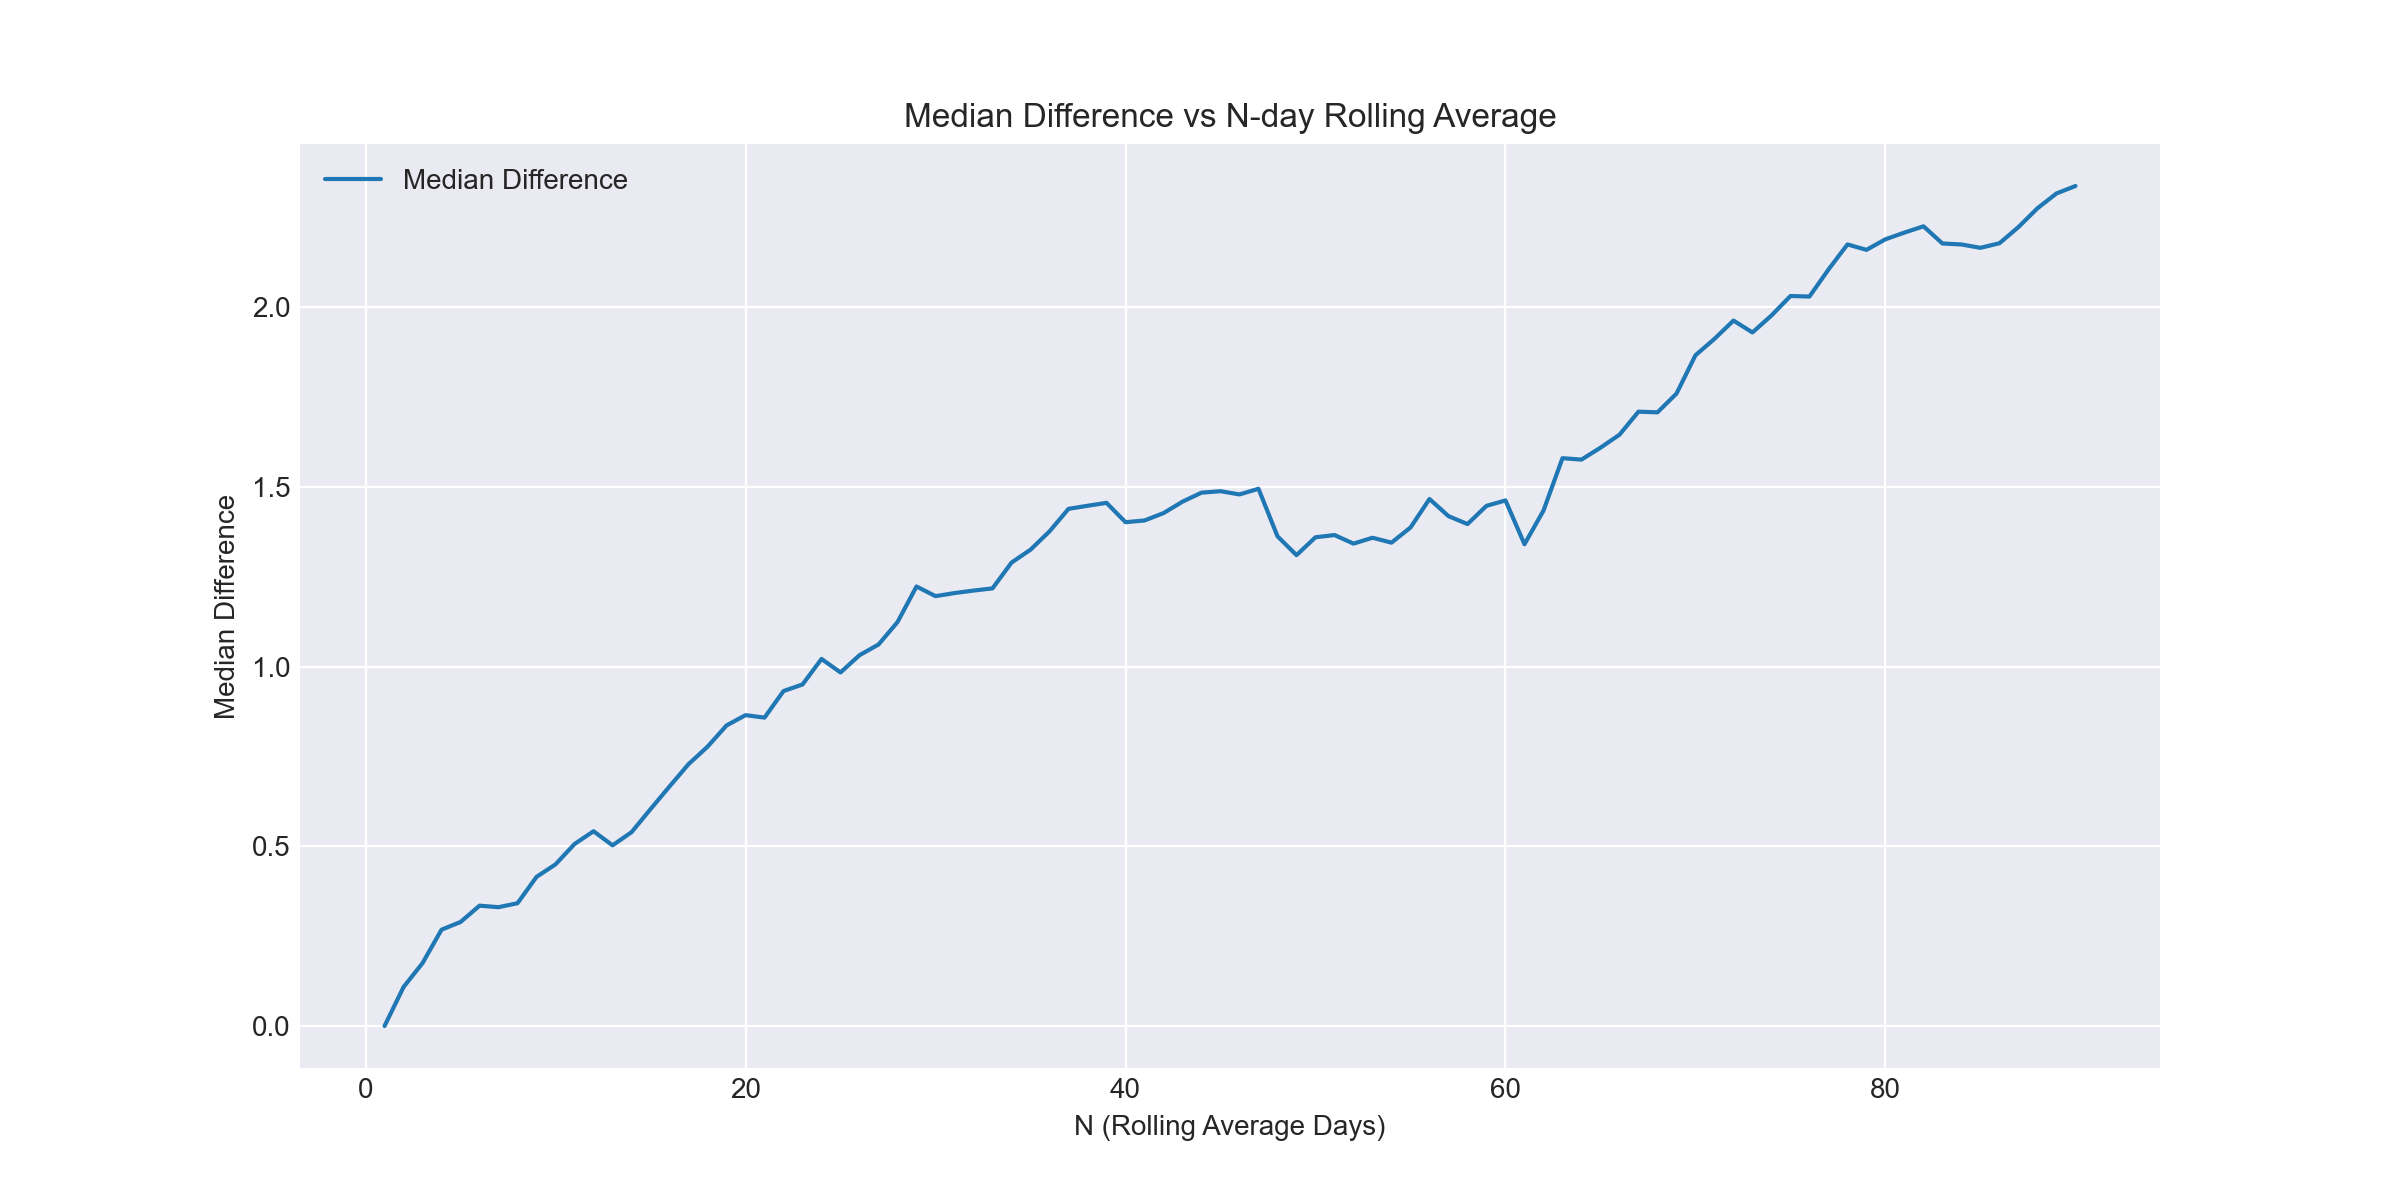

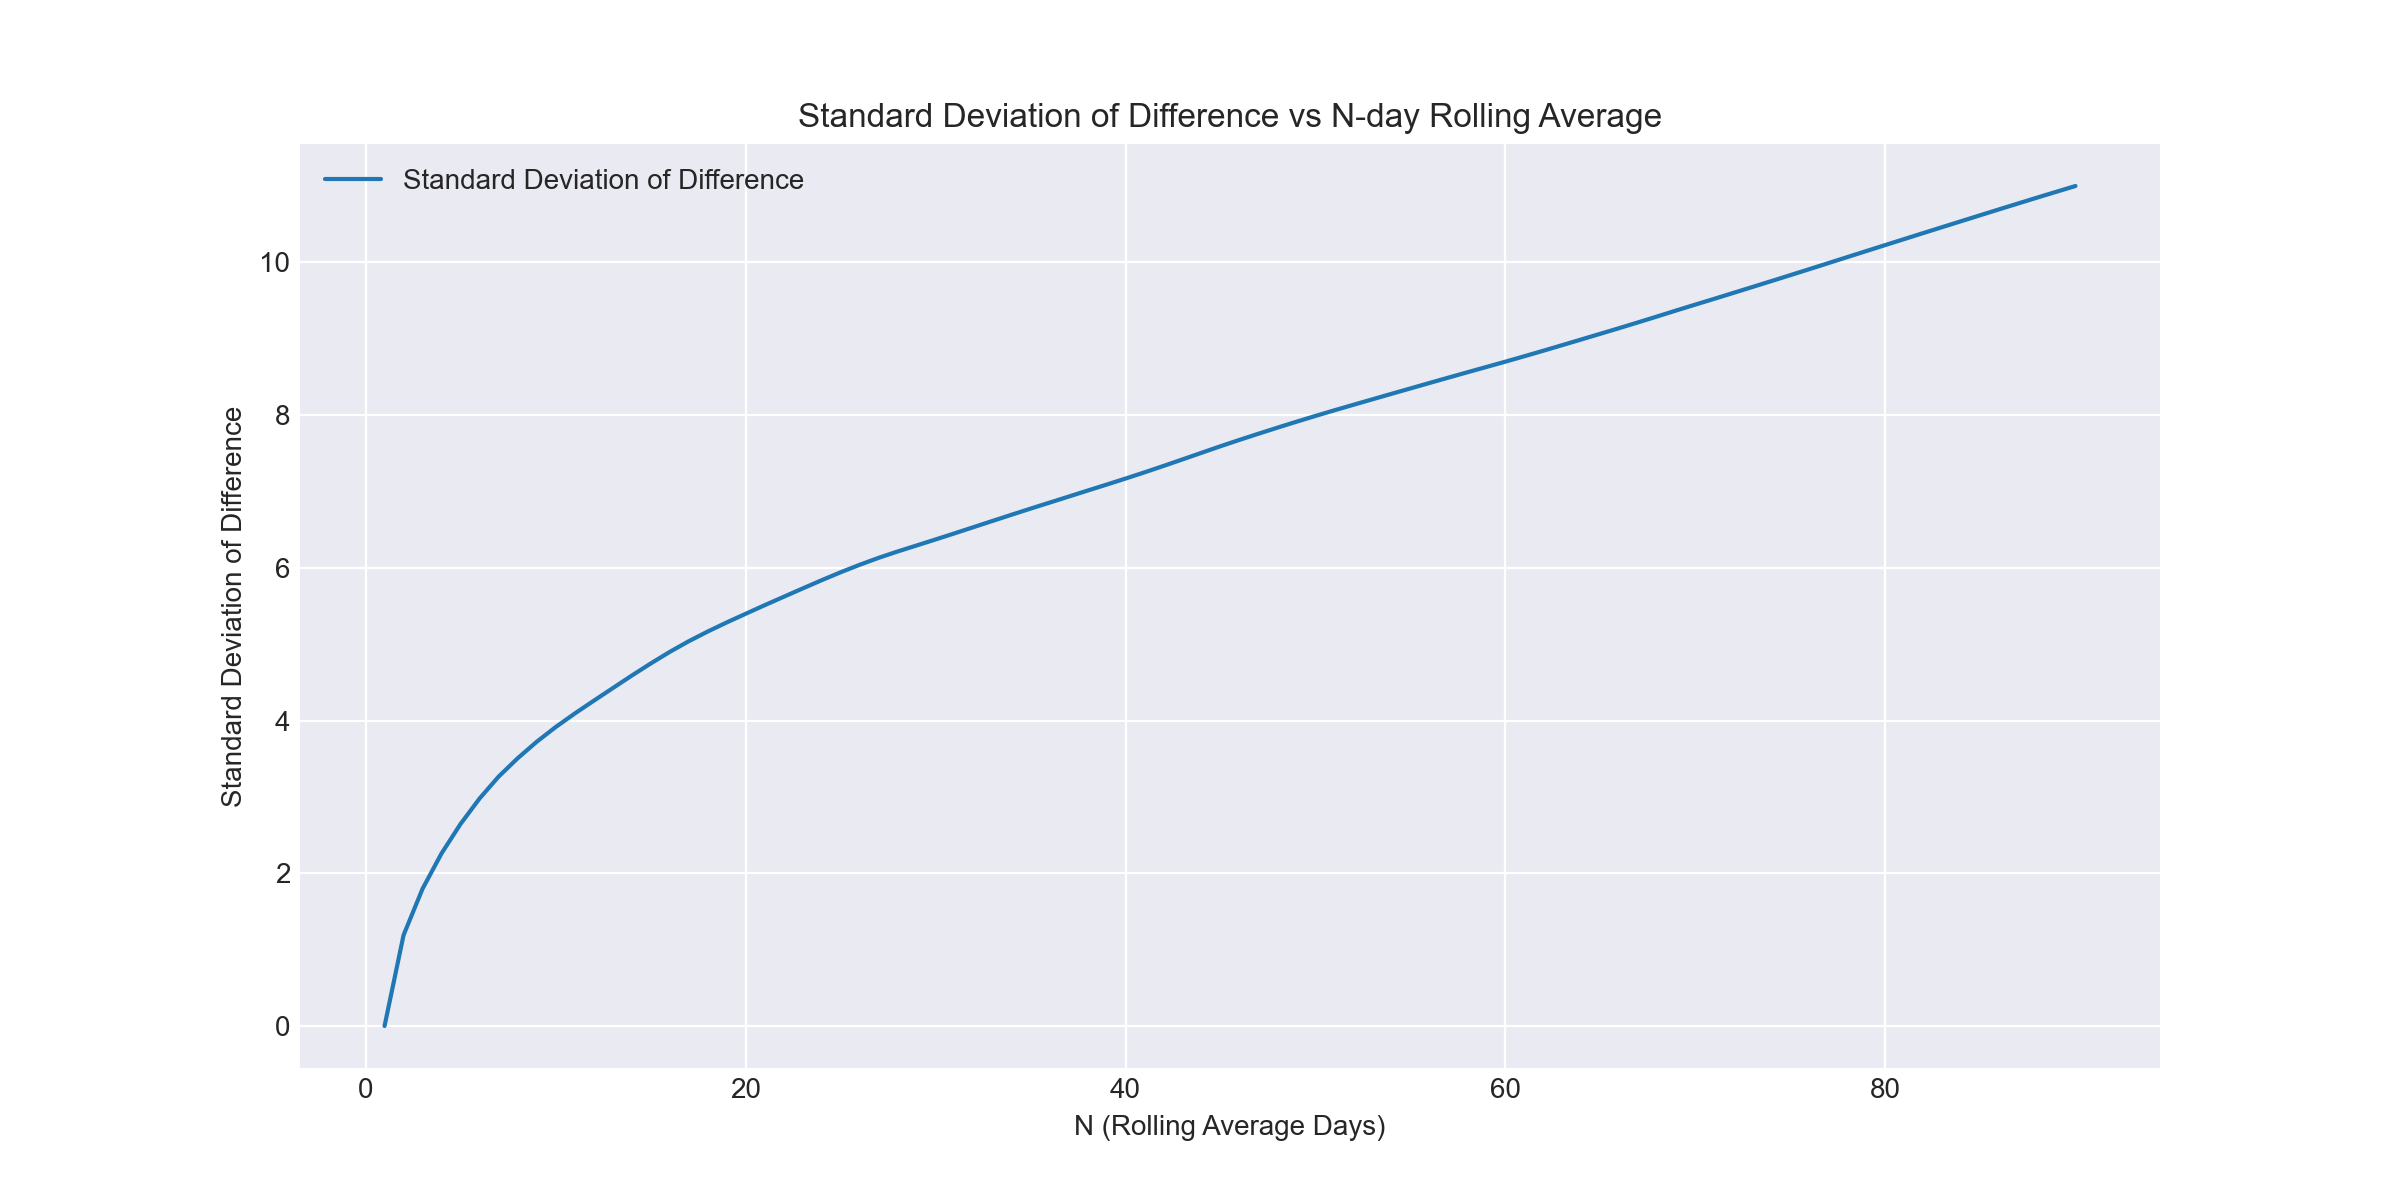

In [35]:
# Various N value for calculating N-day rolling average for plotting median and standard deviation
n_values = list(range(1, 91))


medians = []
std_devs = []

# Compute median and standard deviation for each N
for N in n_values:
    st1[f'rolling_average_{N}'] = st1['spread_ice_g_g_vs_ice_b_b'].rolling(window=N).mean()
    dt = st1['spread_ice_g_g_vs_ice_b_b'] - st1[f'rolling_average_{N}']
    if dt.dropna().empty:
        medians.append(np.nan)
        std_devs.append(np.nan)
    else:
        median_dt = np.median(dt.dropna())
        std_dev_dt = np.std(dt.dropna(), ddof=1)
        medians.append(median_dt)
        std_devs.append(std_dev_dt)

median_df = pd.DataFrame({'N': n_values, 'Median_dt': medians})
std_dev_df = pd.DataFrame({'N': n_values, 'Std_Dev_dt': std_devs})

# Plotting the Median_dt
plt.figure(figsize=(12, 6))
sns.lineplot(data=median_df, x='N', y='Median_dt', label='Median Difference')
plt.title('Median Difference vs N-day Rolling Average')
plt.xlabel('N (Rolling Average Days)')
plt.ylabel('Median Difference')
plt.legend()
plt.show()

# Plotting the Std deviation_dt
plt.figure(figsize=(12, 6))
sns.lineplot(data=std_dev_df, x='N', y='Std_Dev_dt', label='Standard Deviation of Difference')
plt.title('Standard Deviation of Difference vs N-day Rolling Average')
plt.xlabel('N (Rolling Average Days)')
plt.ylabel('Standard Deviation of Difference')
plt.legend()
plt.show()

From the median plot it can be concluded that:
1. The median difference is on an increasing trend which tells that over longer periods, the median of the spread between the two increases, which might suggest widening disparity or growing trend differences over time.
2.  The plot smoothens as N increases, which is typical behavior when applying a rolling average. It means short-term fluctuations are averaged out, revealing more consistent underlying pattern that could be obscured by daily volatility.

From the standard deviation plot it can be seen that:
1. The standard deviation, a measure of dispersion or volatility, is increasing with the length of the rolling average window. This suggests that the risk or uncertainty associated with the spread between the two instruments or measurements increases over longer time frames.
2. The increasing trend in standard deviation with longer rolling windows could indicate that longer-term positions in this spread might carry more risk for investors.

#Defining function to calculate spreads. Calculating spread between CBT_TU_TU and CBT_FV_FV.

In [36]:
def spreads_calculation_2(df1, df2, spreads_name):
    
    merged_data = pd.merge(df1[['date', 'futures']], df2[['date', 'futures']], on='date', suffixes=('_df1', '_df2'))

    # Calculate the spreads (spread multiplier is 1.1066)
    spreads = (merged_data['futures_df1'] - merged_data['futures_df2'])*1.1066

    result_df = pd.DataFrame({'date': merged_data['date'], f'{spreads_name}': spreads})

    return result_df


In [38]:
st2 = spreads_calculation_2(final_cbt_tu_tu, final_cbt_fv_fv, 'spread_cbt_tu_tu_vs_cbt_fv_fv')
st2


,date,spread_cbt_tu_tu_vs_cbt_fv_fv
0,2020-12-03,-17.071034
1,2020-12-04,-16.969019
2,2020-12-07,-17.126364
3,2020-12-08,-17.152300
4,2020-12-09,-17.055472
...,...,...
709,2023-08-25,-5.055779
710,2023-08-28,-5.152606
711,2023-08-29,-5.436172
712,2023-08-30,-5.455192


Now, analysing the spread for cbt_tu_tu vs cbt_fv_fv with various plots. First, is a line chart in which we are comparing the spread with the 30-day rolling average of spread.

C:\Users\nihar\AppData\Local\Temp\ipykernel_27888\1377836319.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


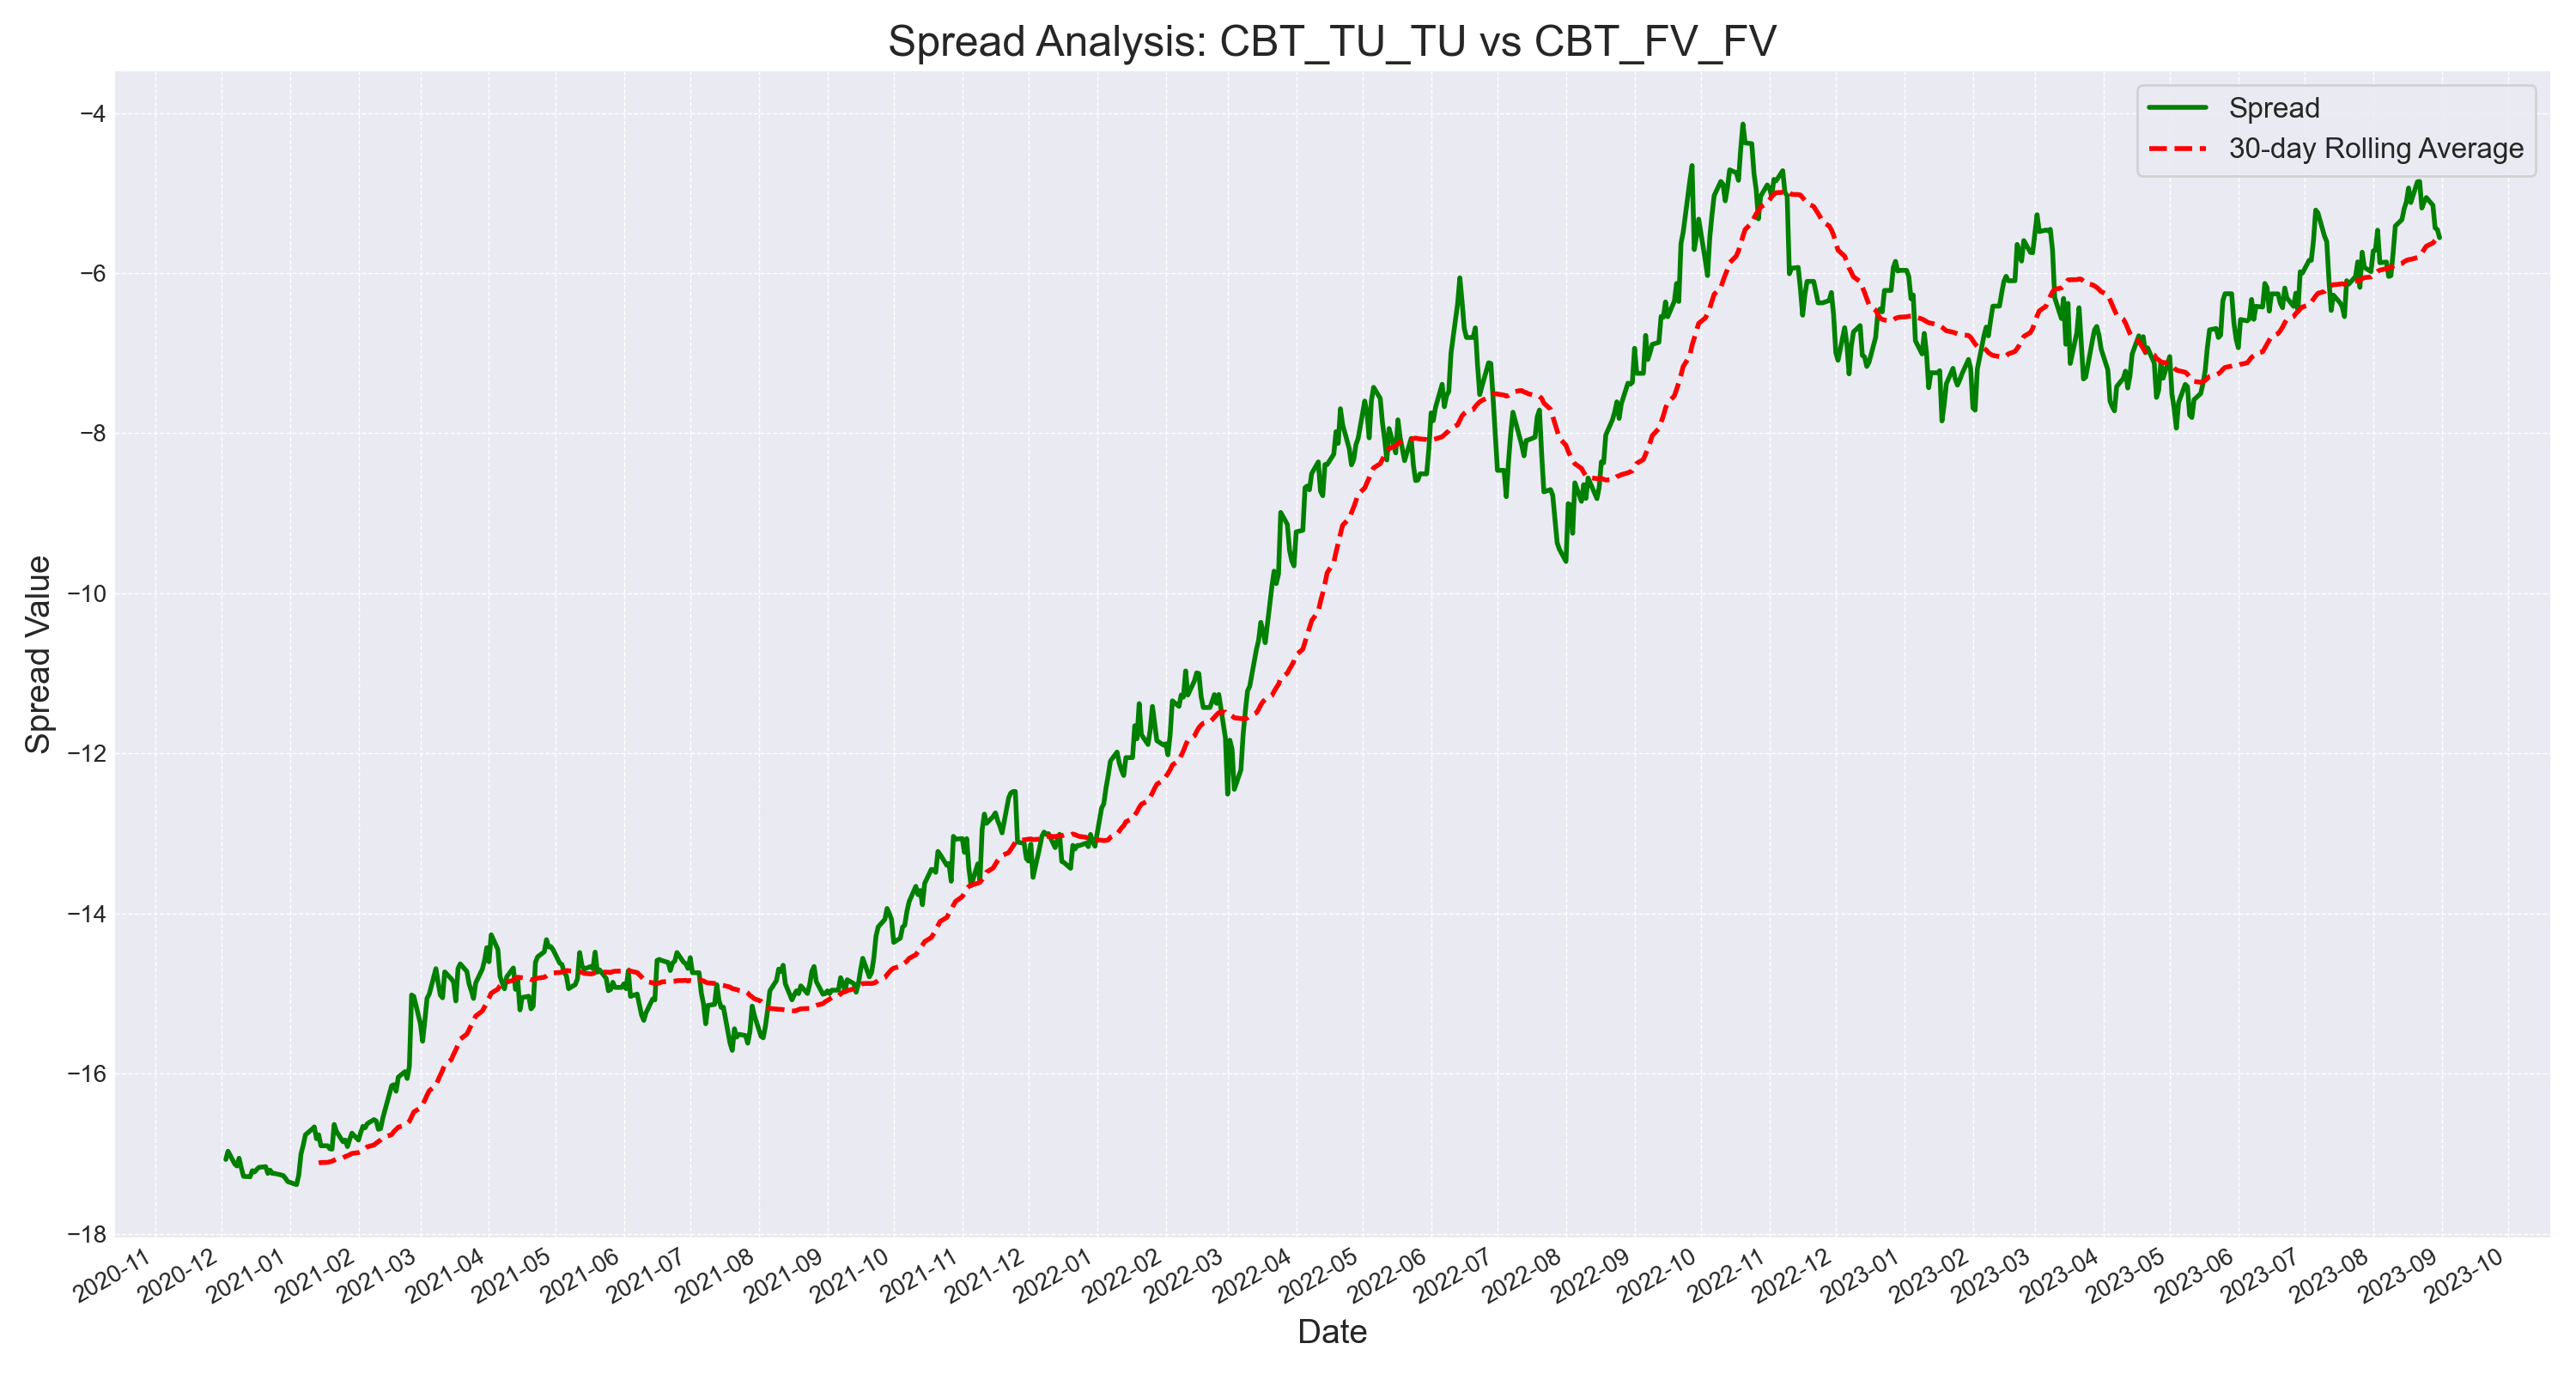

In [39]:
# Line Chart with 30-day Rolling Average
st2['rolling_average_30'] = st2['spread_cbt_tu_tu_vs_cbt_fv_fv'].rolling(window=30).mean()

plt.style.use('seaborn-darkgrid') 
plt.figure(figsize=(15, 8))
plt.plot(st2['date'], st2['spread_cbt_tu_tu_vs_cbt_fv_fv'], label='Spread', linewidth=2, color='green')
plt.plot(st2['date'], st2['rolling_average_30'], label='30-day Rolling Average', linestyle='--', linewidth=2, color='red')

# Add titles and labels
plt.title('Spread Analysis: CBT_TU_TU vs CBT_FV_FV', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Spread Value', fontsize=14)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()  # Rotation

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.legend(frameon=True, fontsize=12)

plt.tight_layout()
plt.show()


Conclusion from the spread analysis plot with 30-day rolling average:
1. There is an upward trend in general which suggest a divergence in the underlying values or market perceptions between CBT_TU_TU and CBT_FV_FV.
2. We can see increasing volatility between the two options from 2022 onwards.
3. We can find certain points in the plot where the spread sharply deviates from the rolling average around mid-2022 and early-2023. These can create some trading opportunities.


Lets look at the histogram:

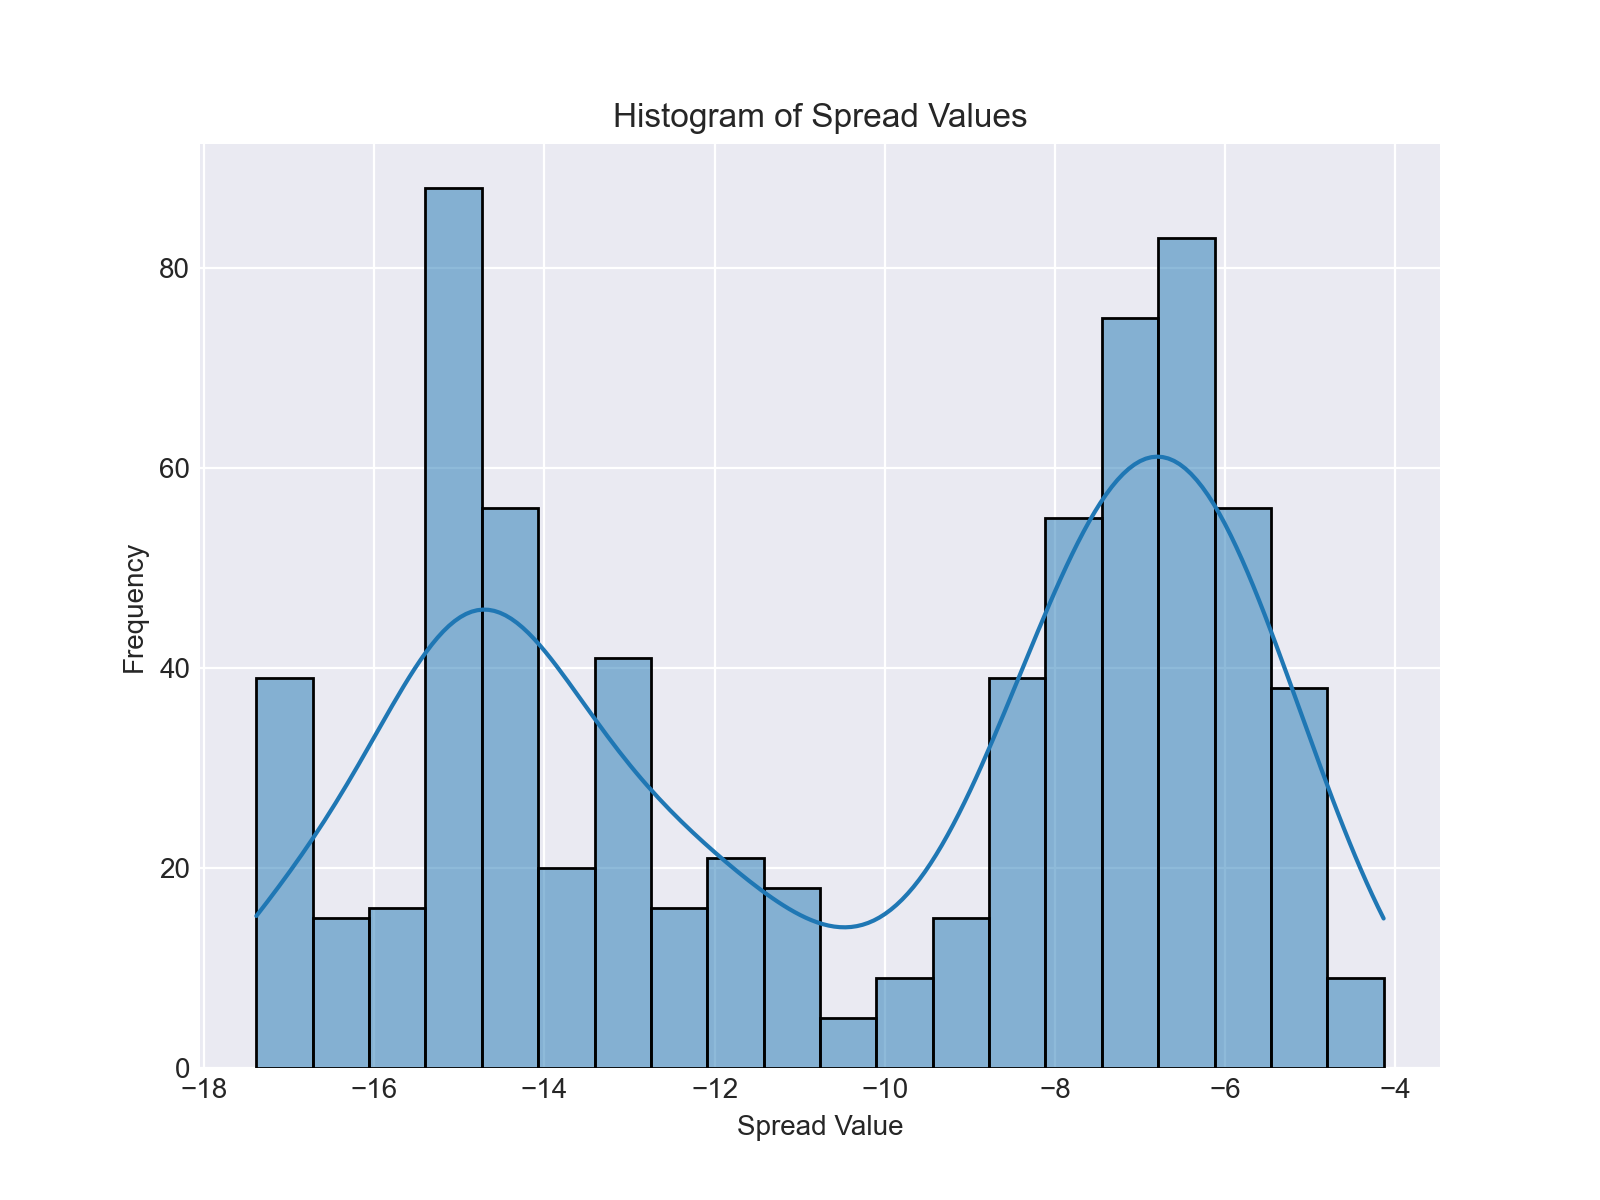

In [40]:
# Histogram of Spread Values
plt.figure(figsize=(8, 6))
sns.histplot(st2['spread_cbt_tu_tu_vs_cbt_fv_fv'], bins=20, kde=True)
plt.title('Histogram of Spread Values')
plt.xlabel('Spread Value')
plt.ylabel('Frequency')
plt.show()

The histogram shows two distinct peaks, which suggests that the data may have a bi-modal distribution. This indicates that there are two different common values around which the data is concentrated. While the histogram appears somewhat symmetrical around the two peaks, there is a slight skew towards the right (higher spread values). This indicates that there are more frequent occurrences of spreads slightly above the lower peak value.

Q-Q Plot for spread_cbt_tu_tu_vs_cbt_fv_fv:

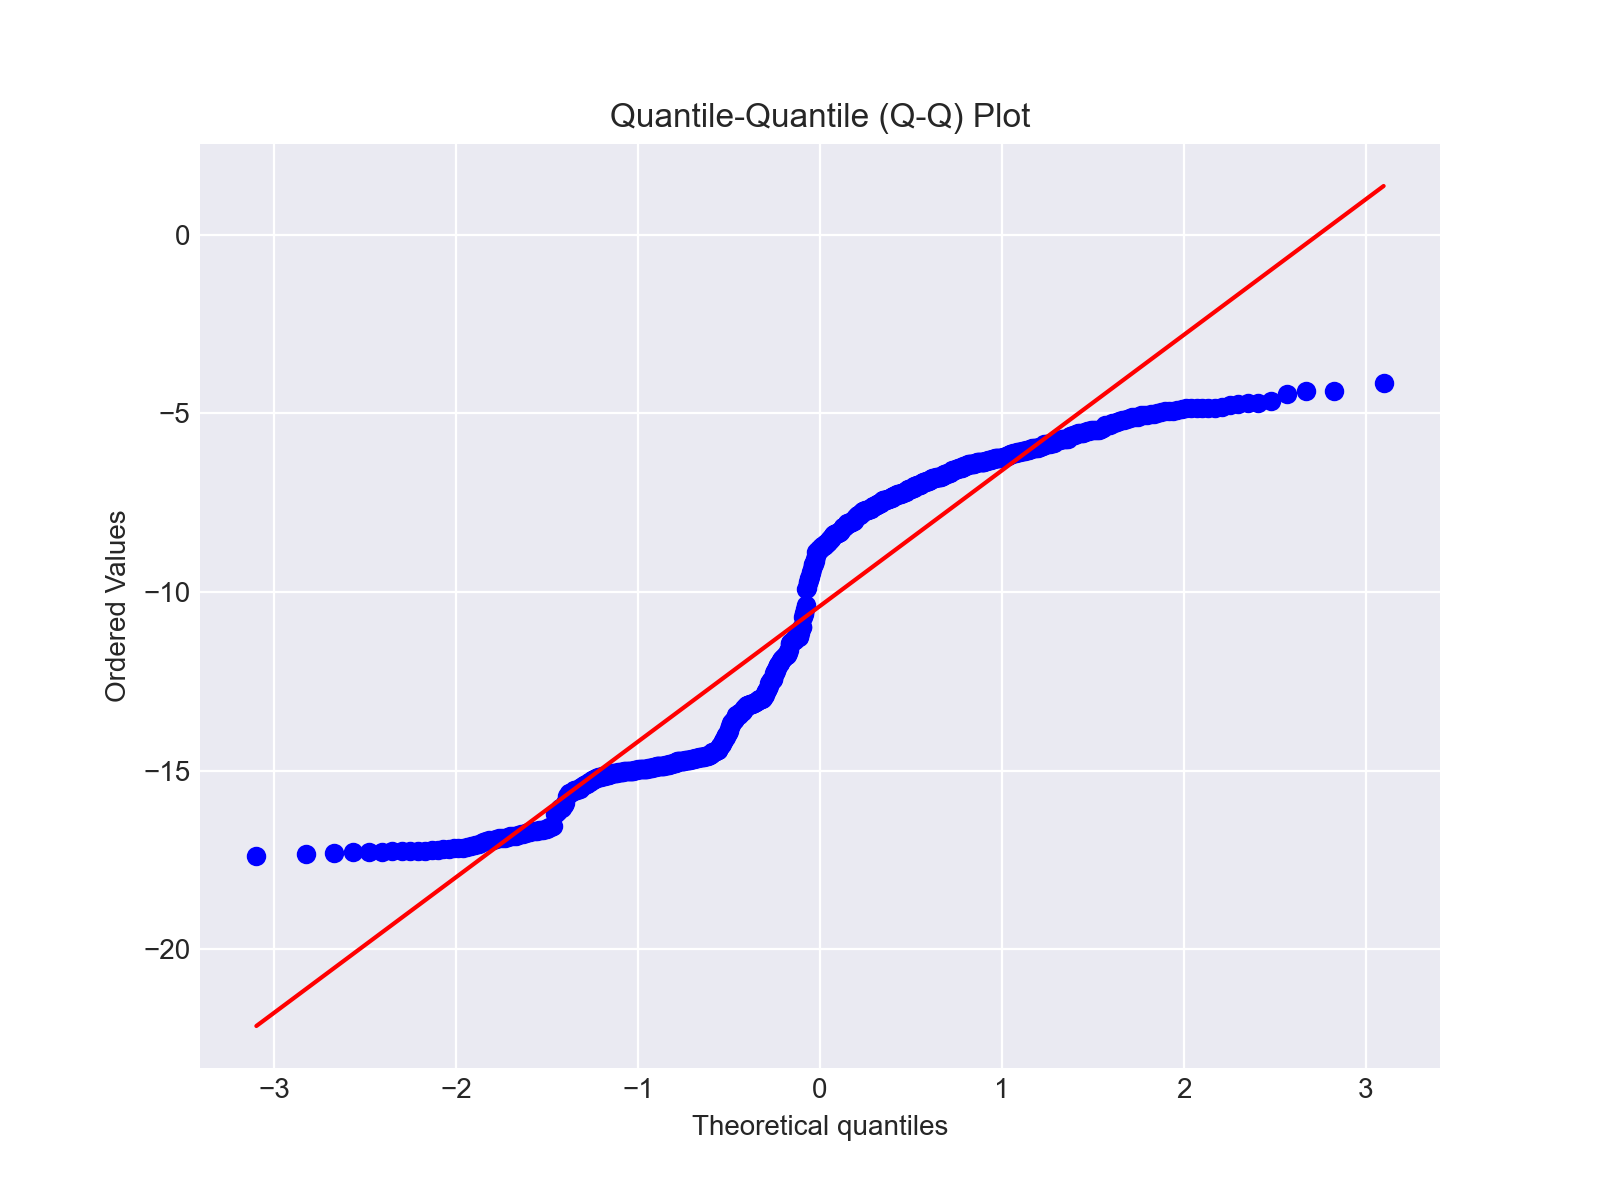

In [41]:
# Quantile-Quantile (Q-Q) Plot
plt.figure(figsize=(8, 6))
probplot(st2['spread_cbt_tu_tu_vs_cbt_fv_fv'], plot=plt)
plt.title('Quantile-Quantile (Q-Q) Plot')
plt.show()

The Q-Q plot shows that the data points at the lower and upper ends of the distribution (the tails) deviate significantly from the line, which represents the expected values if the data were normally distributed. This indicates that the distribution of spread 2 has heavier tails than the normal distribution, suggesting a higher occurrence of extreme values (outliers) than would be expected in a normal distribution. It suggests the deviation of the actual data from the theoretical line in the tails could be a sign of skewness or the presence of outliers within the dataset. 

Let's look at the autocorrelation plot:

<Figure size 1000x600 with 0 Axes>

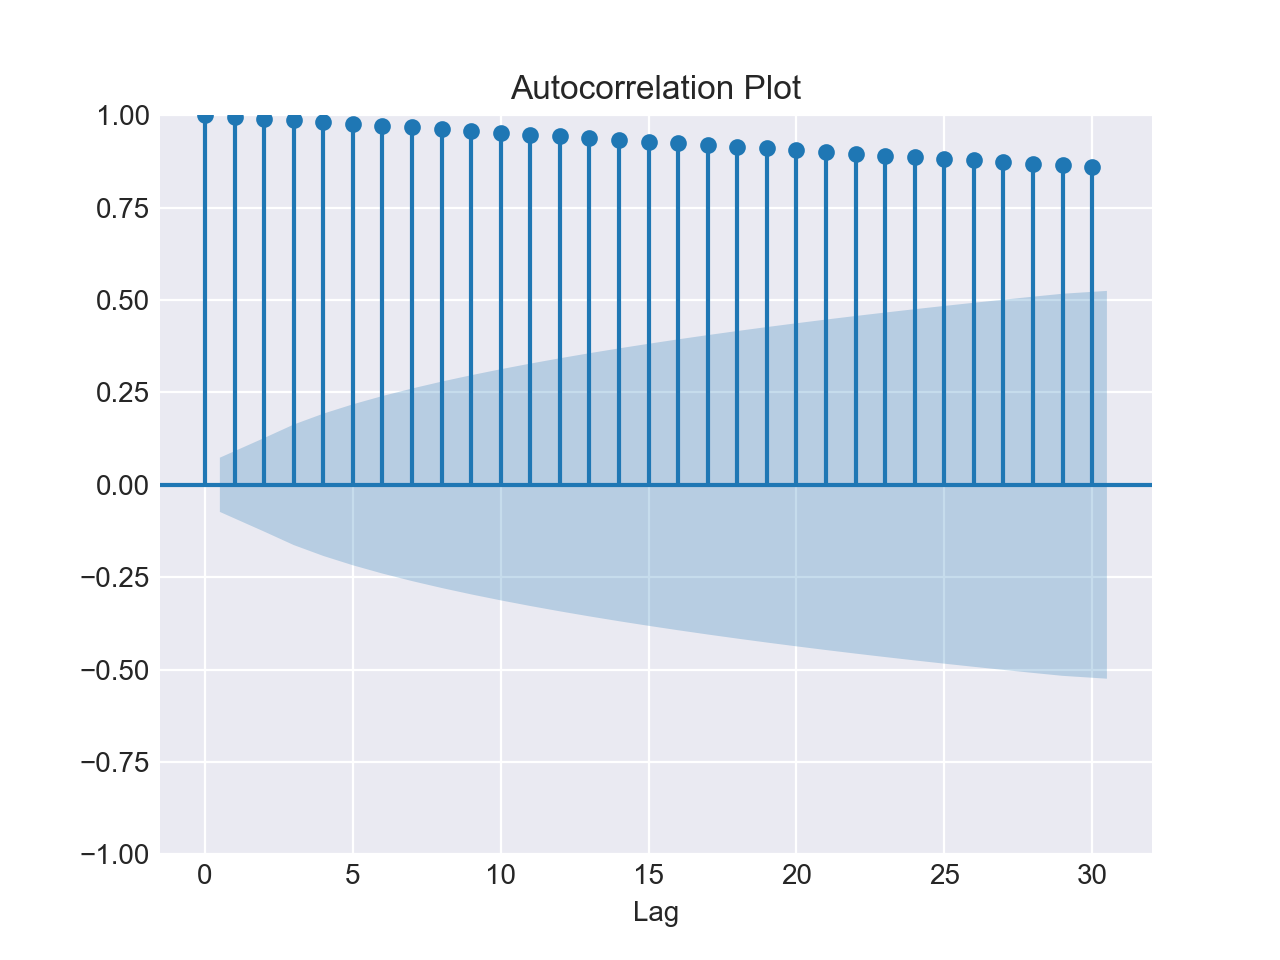

In [42]:
# Autocorrelation Plot
plt.figure(figsize=(10, 6))
plot_acf(st2['spread_cbt_tu_tu_vs_cbt_fv_fv'], lags=30)
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.show()

Similar to spread 1, the plot indicates that there is a significant positive autocorrelation at various lag intervals, given the spikes that extend above the confidence band (the shaded area). This suggests that past values of the time series have a strong positive relationship with future values up to a certain number of lags.

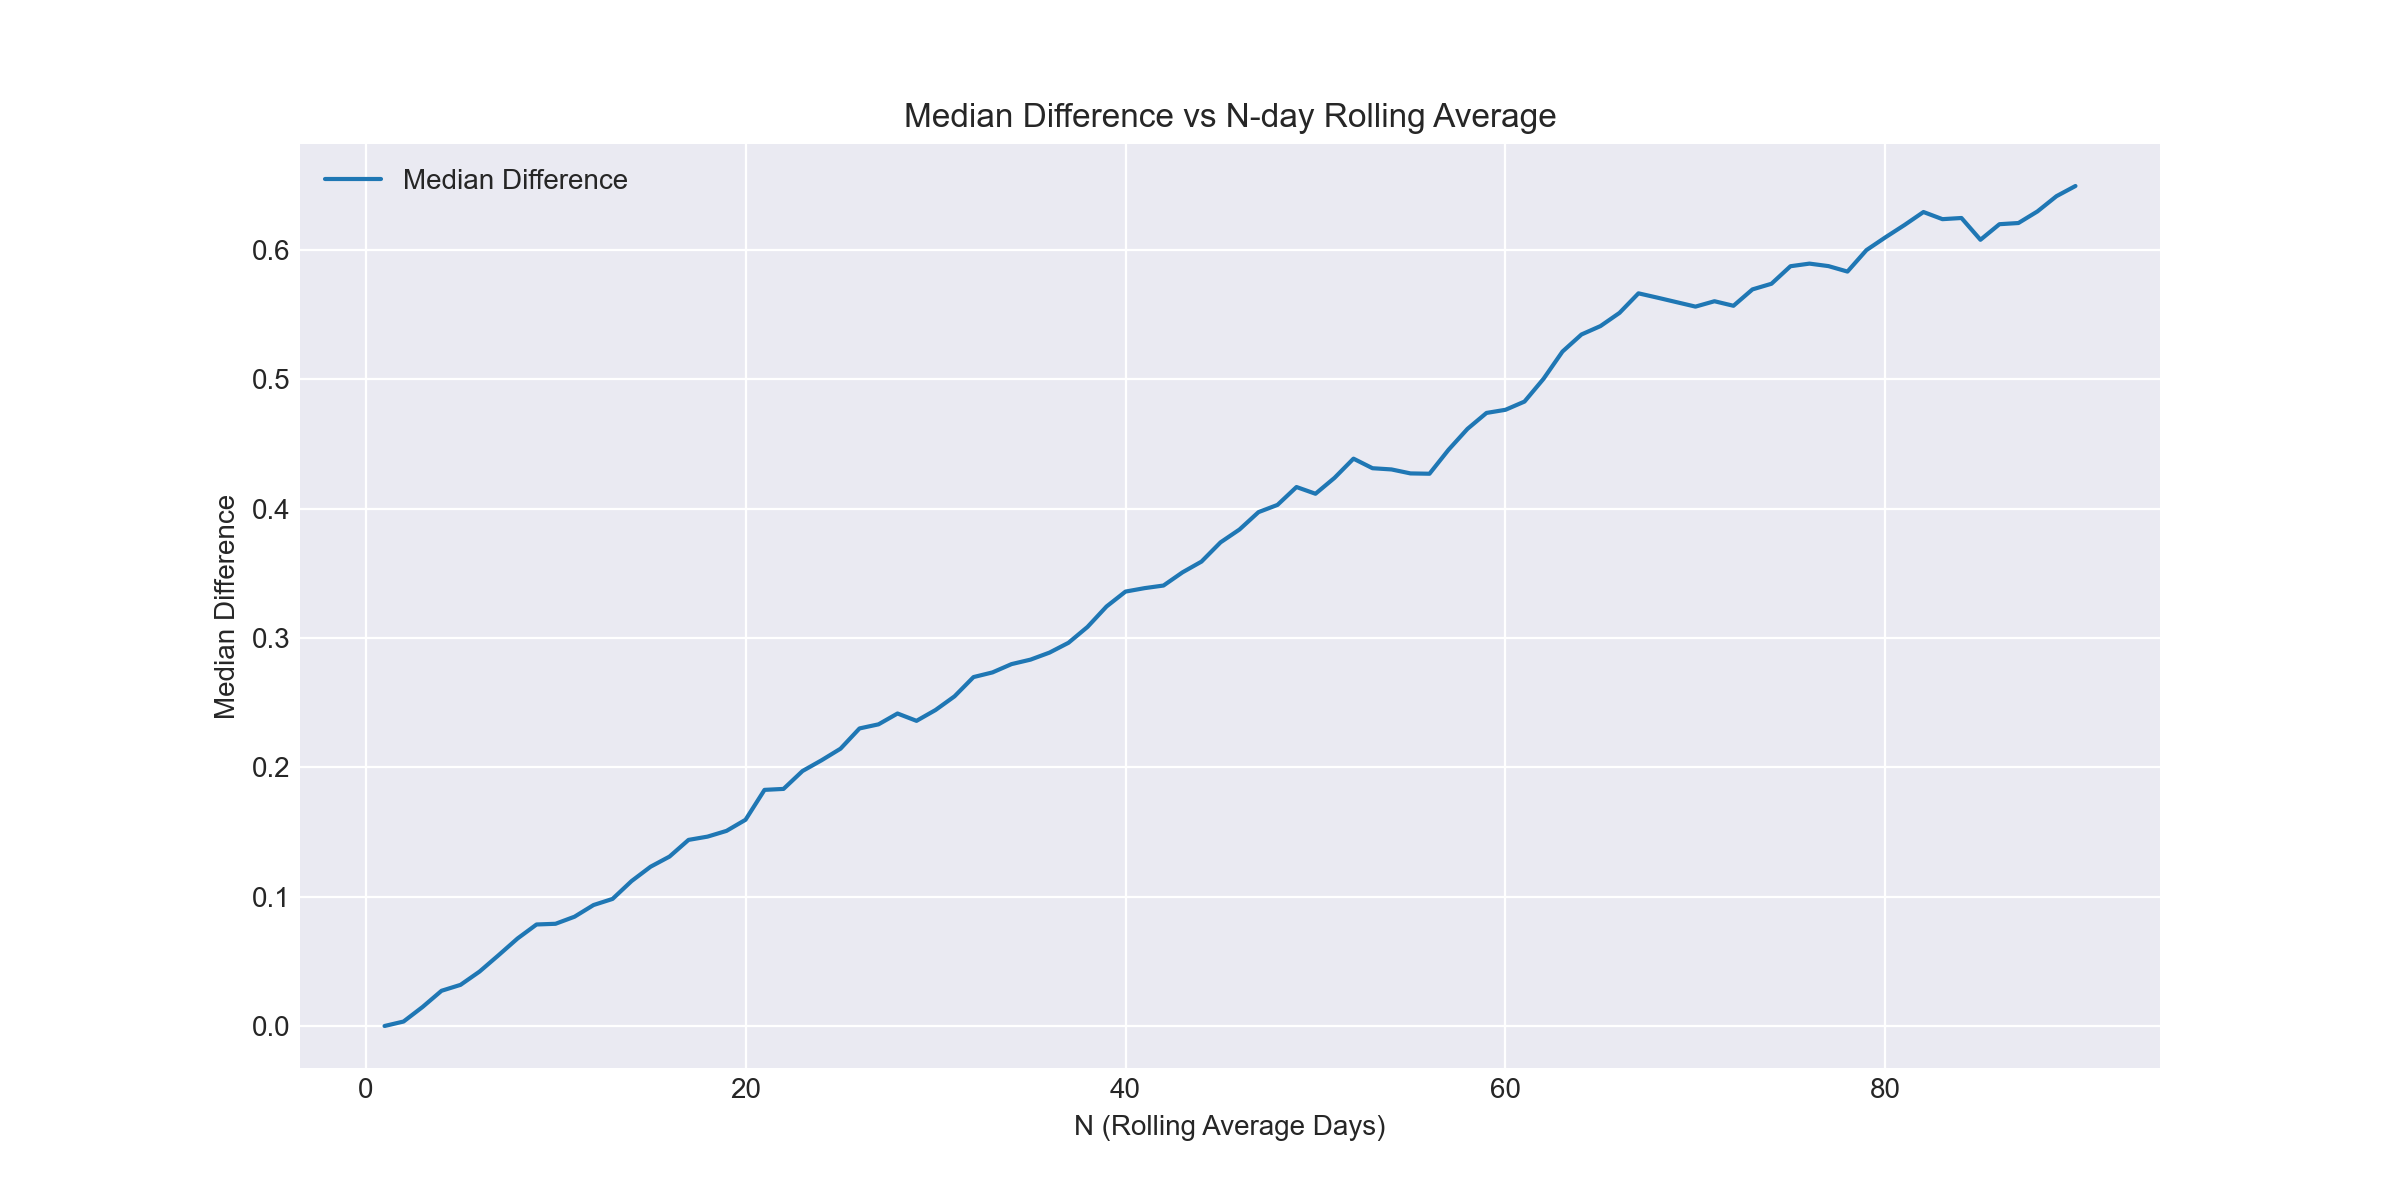

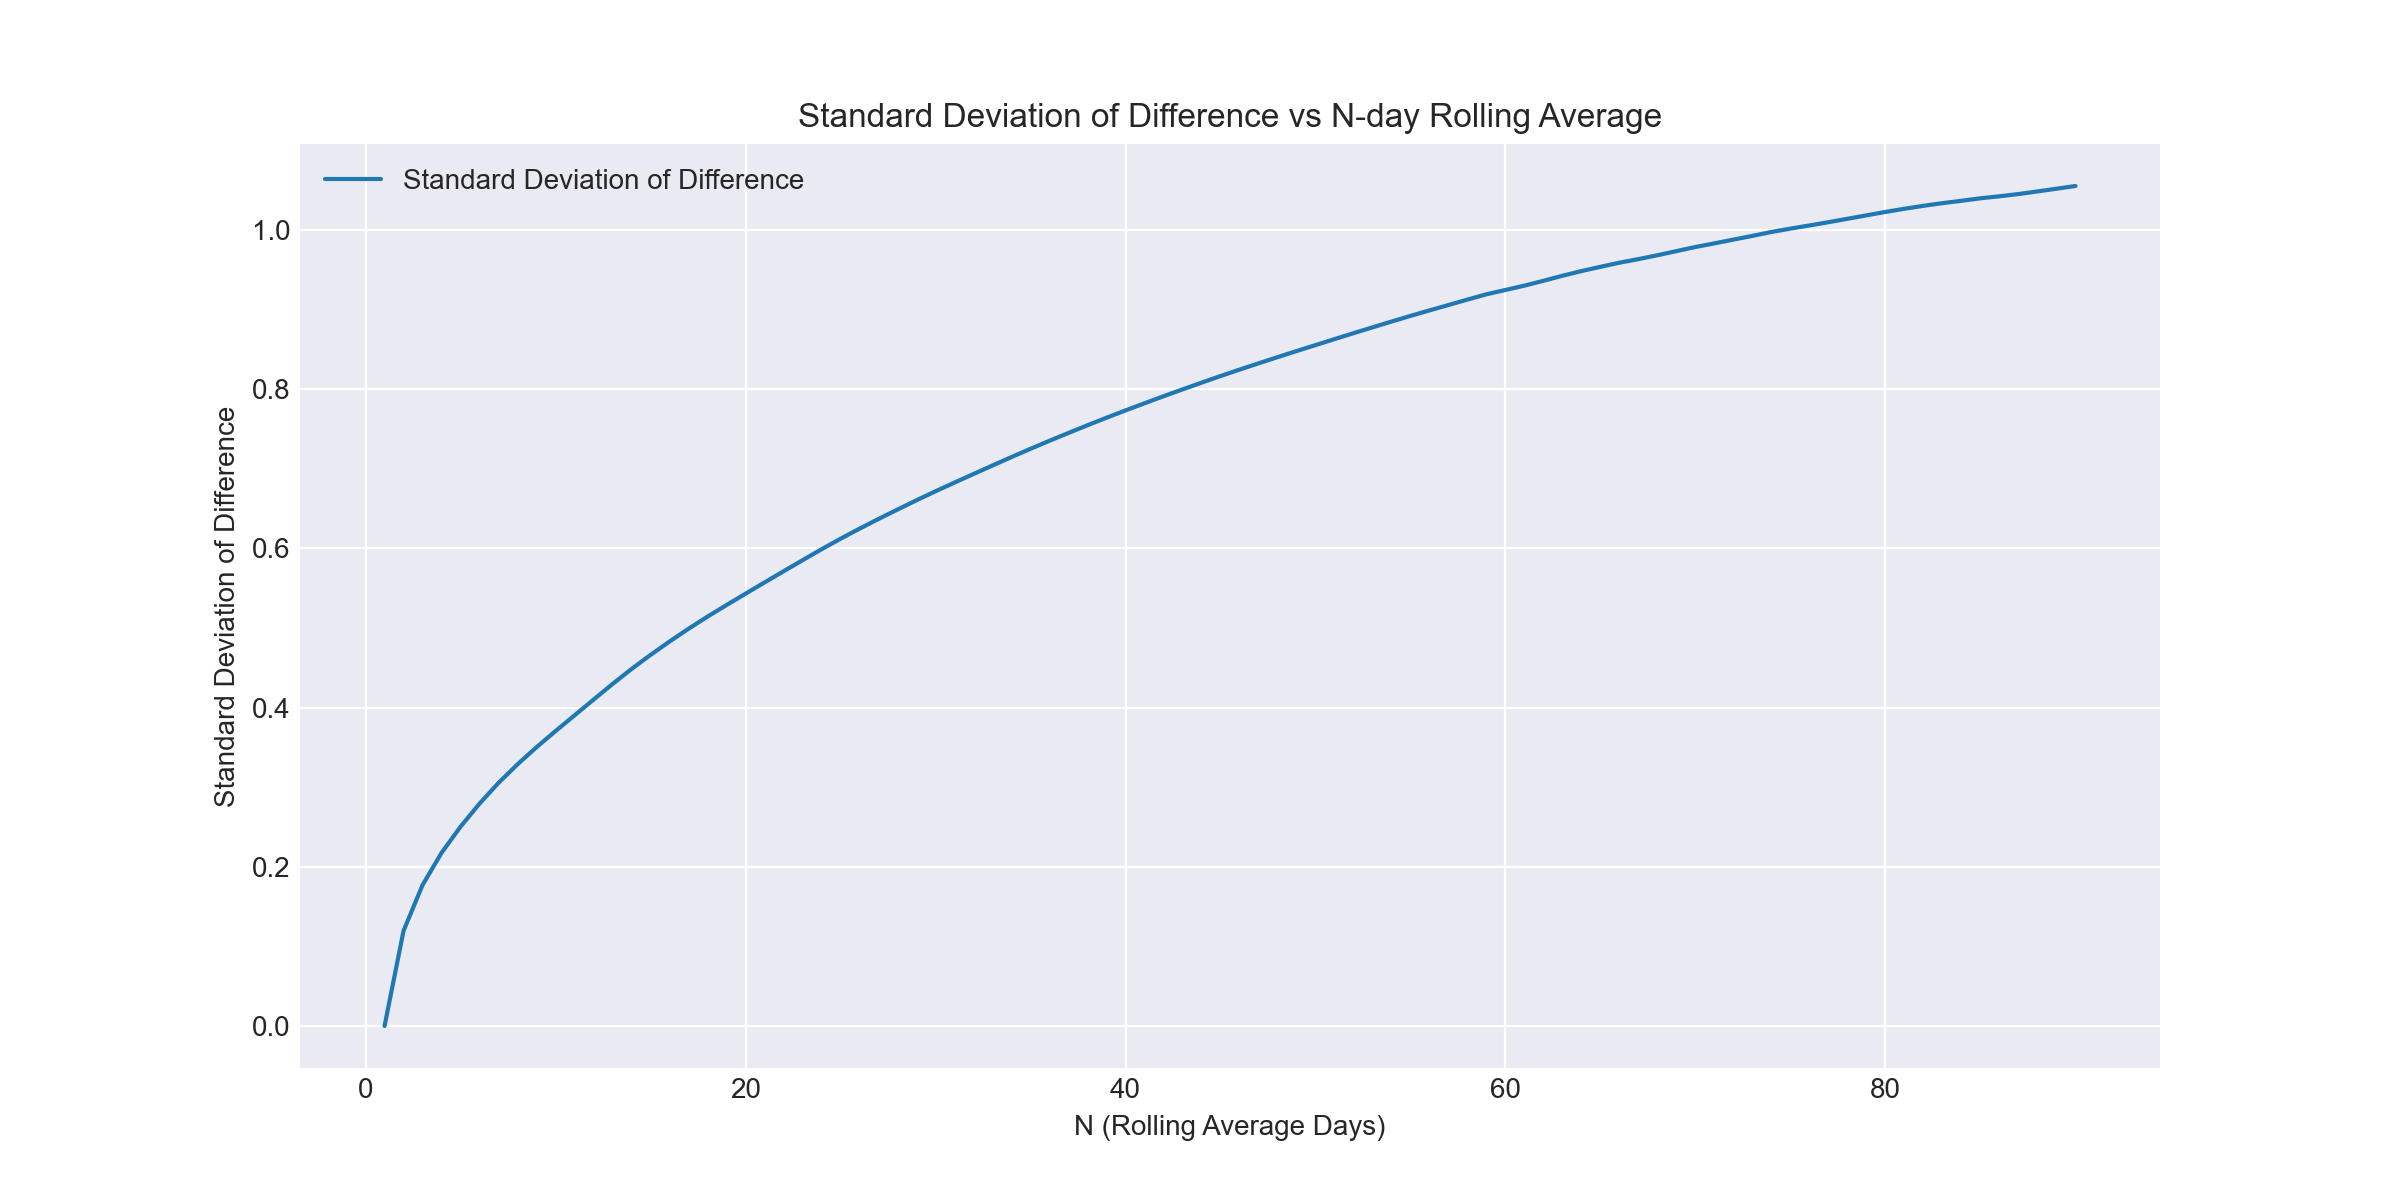

In [43]:
# Various N value for calculating N-day rolling average for plotting median and standard deviation
n_values = list(range(1, 91))


medians = []
std_devs = []

# Compute median and standard deviation for each N
for N in n_values:
    st2[f'rolling_average_{N}'] = st2['spread_cbt_tu_tu_vs_cbt_fv_fv'].rolling(window=N).mean()
    dt = st2['spread_cbt_tu_tu_vs_cbt_fv_fv'] - st2[f'rolling_average_{N}']
    if dt.dropna().empty:
        medians.append(np.nan)
        std_devs.append(np.nan)
    else:
        median_dt = np.median(dt.dropna())
        std_dev_dt = np.std(dt.dropna(), ddof=1)
        medians.append(median_dt)
        std_devs.append(std_dev_dt)

median_df = pd.DataFrame({'N': n_values, 'Median_dt': medians})
std_dev_df = pd.DataFrame({'N': n_values, 'Std_Dev_dt': std_devs})

# Plotting the Median_dt
plt.figure(figsize=(12, 6))
sns.lineplot(data=median_df, x='N', y='Median_dt', label='Median Difference')
plt.title('Median Difference vs N-day Rolling Average')
plt.xlabel('N (Rolling Average Days)')
plt.ylabel('Median Difference')
plt.legend()
plt.show()

# Plotting the Std deviation_dt
plt.figure(figsize=(12, 6))
sns.lineplot(data=std_dev_df, x='N', y='Std_Dev_dt', label='Standard Deviation of Difference')
plt.title('Standard Deviation of Difference vs N-day Rolling Average')
plt.xlabel('N (Rolling Average Days)')
plt.ylabel('Standard Deviation of Difference')
plt.legend()
plt.show()

From the median difference plot for spread between CBT_TU_TU vs CBT_FV_FV:
1. The median difference is gradually increasing as the number of days in the rolling average grows. This trend suggests that the spread is widening over time, indicating that the difference between the two measures being compared is becoming more pronounced as the period considered for the rolling average increases. 
2. The upward trajectory seems fairly steady without sharp jumps, which might imply that the changes in the spread are not abrupt but gradual. There are minor fluctuations in the slope, but these do not appear to indicate any major volatility in the median difference over the different rolling window sizes.
3. The consistency of the trend without any downward sections suggests that the spread does not typically revert to narrower differences over the range of rolling average days shown.

From the standard deviation of difference plot for spread between CBT_TU_TU vs CBT_FV_FV:
1. The standard deviation of the difference increases as the N-day rolling window increases, suggesting that the variability or uncertainty of the spread grows with the length of the time period being considered. this is similar to spread 1.
2.  Investors or analysts might interpret the increasing standard deviation with a larger N as an indication that holding a position over a longer period could involve more risk, as the spread becomes more variable and less predictable.


#Analysis between both the spreads and finding their inter-relation. Let's analyse if there is any correlation between both the spreads.

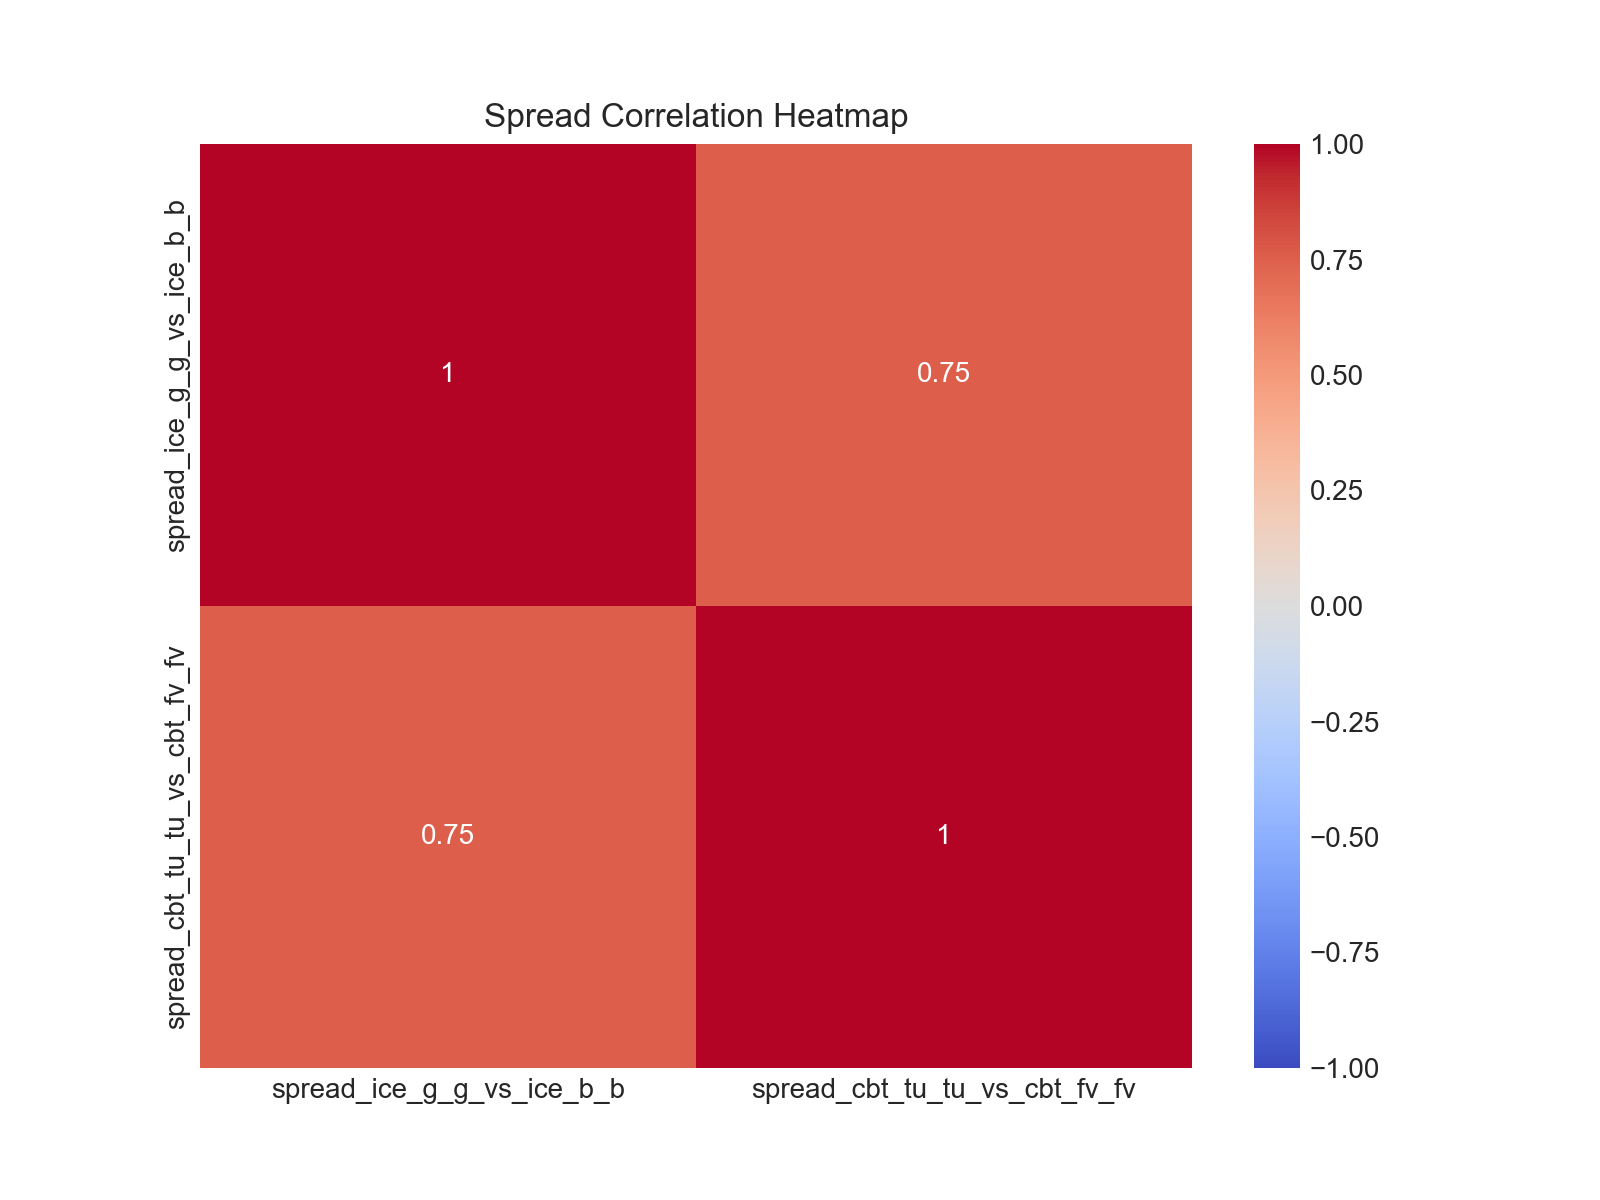

In [44]:
merged_data = pd.merge(st1, st2, on='date', suffixes=('_st1', '_st2'))

# Correlation matrix
correlation_matrix = merged_data[['spread_ice_g_g_vs_ice_b_b', 'spread_cbt_tu_tu_vs_cbt_fv_fv']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spread Correlation Heatmap')
plt.show()


It can be seen from the correlation heatmap that there is significant positive correlation between the two spreads as correlation is close to 1 i.e. 0.75. It can be concluded that if one spread increases or decreases the other spread will also behave the same way. The high correlation implies that the spreads may be influenced by common factors, such as market conditions, economic events, or related underlying assets. Moreover, the price movements in one future contract may be predictive or related to the price movements in the other, which could be useful for cross-market analysis or constructing hedging strategies.

#Rolling Volatility Analysis for two spreads:

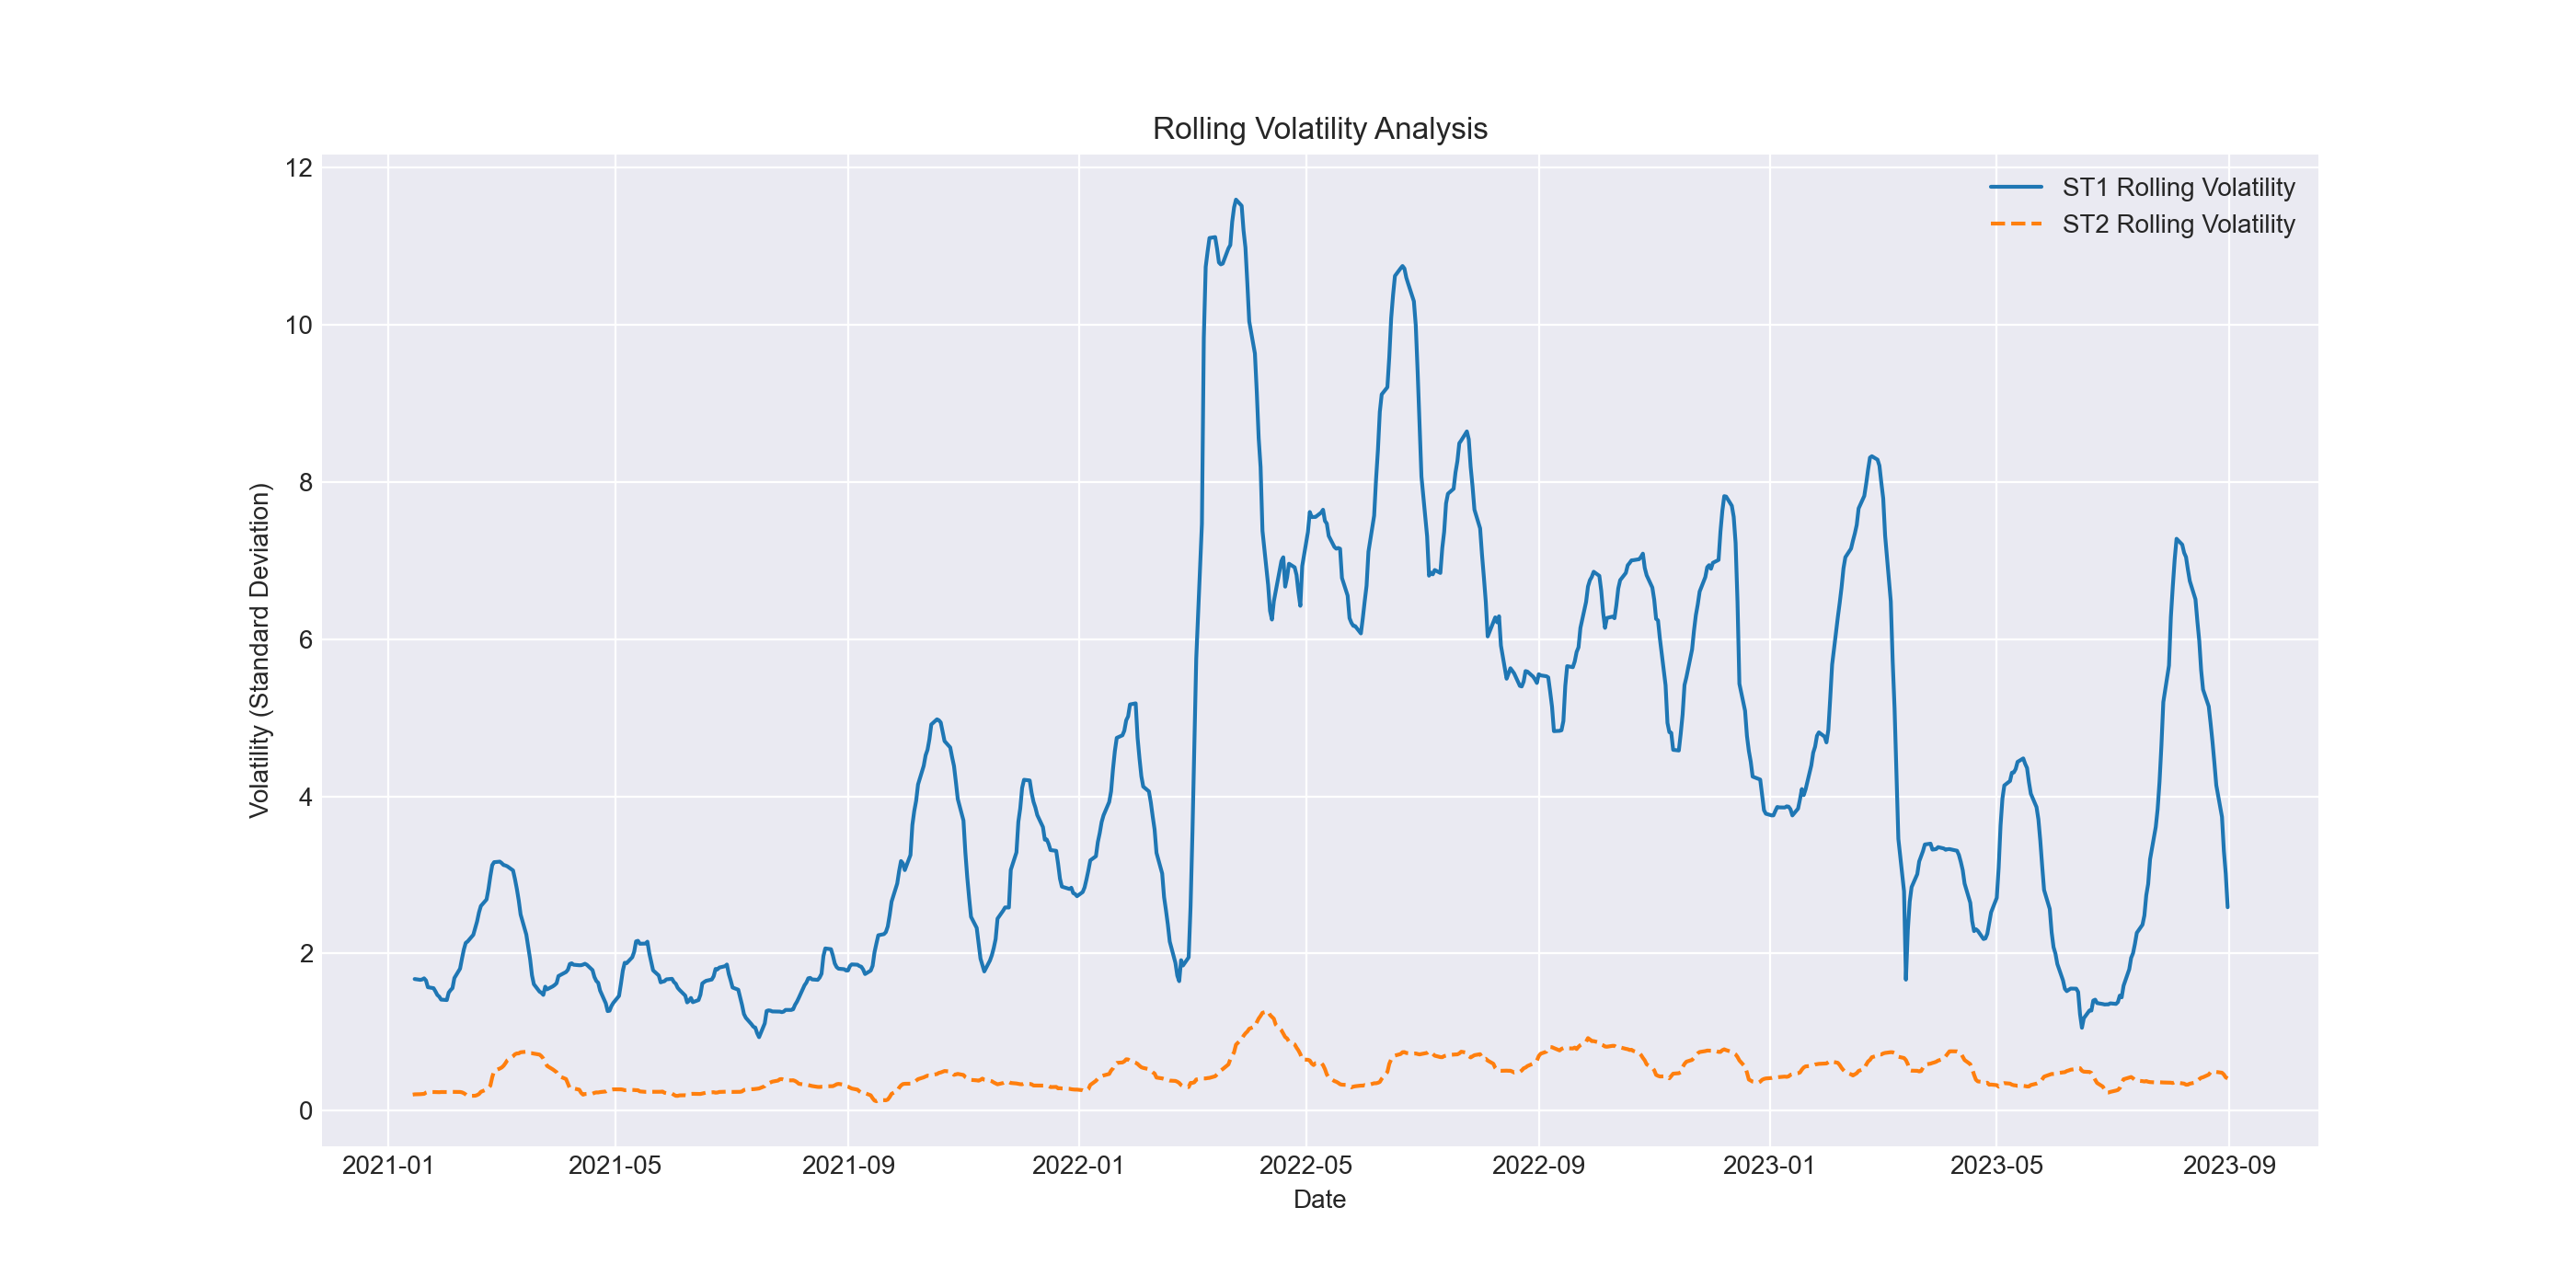

In [45]:
# Calculate rolling standard deviation for both spreads
window_size = 30 
st1['rolling_volatility'] = st1['spread_ice_g_g_vs_ice_b_b'].rolling(window=window_size).std()
st2['rolling_volatility'] = st2['spread_cbt_tu_tu_vs_cbt_fv_fv'].rolling(window=window_size).std()

# Plot the rolling volatility
plt.figure(figsize=(14, 7))
plt.plot(st1['date'], st1['rolling_volatility'], label='ST1 Rolling Volatility')
plt.plot(st2['date'], st2['rolling_volatility'], label='ST2 Rolling Volatility', linestyle='--')
plt.title('Rolling Volatility Analysis')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation)')
plt.legend()
plt.show()


In the above plot, it can be clearly seen that there is high volatility in spread between ICE_B_B and ICE_G_G (st1) whereas the spread between the other pair(st2) is quite stable when compared with rolling standard deviation. It can be said that st2 is not very sensitive to short-term market variations as compared to st1.

4. Conclusion from the various analysis:

As per the detailed analysis the follwoing can be concluded:
1. The median difference plots revealed a general increasing trend in the spreads over time, suggesting a divergence in the underlying values or market perceptions of the financial instruments in question. Additionally, there appeared to be a mean reversion tendency, with spreads oscillating around a rolling average, indicating potential for strategy formulation in trading.
2. The standard deviation plots indicated an increase in volatility with the length of the rolling window. Such findings highlight that the risk associated with the spreads grows over longer time frames, which is an important consideration for risk management and long-term financial planning.
3. Histograms and Q-Q plots provided insights into the distribution of the spread values. Bi-modal distributions and deviations from normality, particularly in the tails, suggesting the presence of outliers or non-normal behavior. This has implications for the application of statistical models that assume normality.

Summarizing, the financial spread data exhibits complex behaviors that evolve over time, with implications for trading, risk management, and modeling. The observed mean-reverting patterns and increasing volatility over time suggest a dynamic market environment, while the non-normal distribution of returns calls for careful application of statistical methods. Tail risk and autocorrelation are critical factors to consider, emphasizing the need for robust, tailored analytical strategies. Understanding these characteristics is crucial for making informed decisions in financial analysis and trading.

5. References:

1. John C. Hull - Options, Futures, and Other Derivatives-Prentice Hall (2012): This book has been used to derive some content reglated to futures and options.
2. Chat GPT has been used for debugging some code snippets for example: The symlink portion in the grab_quanl_table does not work so chat gpt suggested to use shutil package to resolve the issue.